In [35]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime
from time import time
from datetime import timedelta
import mercury as mr 
import warnings
warnings.filterwarnings('ignore')

In [36]:
app = mr.App(title="E24 2024 Analysis")

mercury.App

<font size="7">This page analyses the 2024 E24 ebike mountain bike race.  </font>

<font size="3">The first section looks at the results of the race by a number of metrics. The second section analyses just the competitors named in the box. Put your list of riders in to see how they compare on metrics that account for performance relative to class entered and metrics that discard outlying stages such as those affected by mechanical failures or falls. 

All data is from https://www.sportident.co.uk/results/TweedLove/2024/E24. Any names entered must match those exactly. 

In order to make this analysis work a default time of 10 minutes has been used for riders missing stages (such as those that raced the short course). Make sure to look at the median metrics for a more accurate analysis of riders who missed stages.

Any questions, please email mulholland.william@gmail.com with the subject: mtb Analysis question.

If this page is of more than fleeting interest, please consider donating to the air ambulance service: https://theairambulanceservice.org.uk

 </font>

In [37]:
#read the results data from the site
#df1 = pd.read_csv("E24_SaturdayResults.csv", index_col=1)
#df2 = pd.read_csv("E24_SundayResults.csv", index_col=1)


In [38]:
# join on name
#df = df1.join(df2, lsuffix='', rsuffix='_r')
#df = df.reset_index()

In [39]:
import pandas as pd
from io import StringIO


# Use StringIO to capture the CSV output
#csv_buffer = StringIO()
#df.to_csv(csv_buffer, index=False)

# Get the CSV string from the buffer
#csv_string = csv_buffer.getvalue()

# Print the CSV string (you can copy this to use in your notebook)
#print(csv_string)


csv_data = """Name,Class,Stage 1: Feed the Pony,Stage 2: Angry Sheep,Stage 3: Cresta/IXS/Crestador,Stage 4: Cadon Bank,Stage 5: Alistair Lees,Stage 6: Gold/Tunnel/Old Gold/Cresta,Class_r,Stage 7: New York New York,Stage 8: Lower Repeat Offender,Stage 9: Mustard/Zorro/Returns,Stage 10: Thunderstruck,Stage 11: Boundary/5yr Plan,Stage 12: Shane McGowan/MildPeril/Deliverance,Stage 13: Ewok/XX/Head Over Heels,Overall_time_seconds,Overall_time,Overall_time_normalised,Stage 1: Feed the Pony_normalised,Stage 2: Angry Sheep_normalised,Stage 3: Cresta/IXS/Crestador_normalised,Stage 4: Cadon Bank_normalised,Stage 5: Alistair Lees_normalised,Stage 6: Gold/Tunnel/Old Gold/Cresta_normalised,Stage 7: New York New York_normalised,Stage 8: Lower Repeat Offender_normalised,Stage 9: Mustard/Zorro/Returns_normalised,Stage 10: Thunderstruck_normalised,Stage 11: Boundary/5yr Plan_normalised,Stage 12: Shane McGowan/MildPeril/Deliverance_normalised,Stage 13: Ewok/XX/Head Over Heels_normalised,Overall_time_normalised_by_class_winner_time,Stage 1: Feed the Pony_normalised_by_class_winner_time,Stage 2: Angry Sheep_normalised_by_class_winner_time,Stage 3: Cresta/IXS/Crestador_normalised_by_class_winner_time,Stage 4: Cadon Bank_normalised_by_class_winner_time,Stage 5: Alistair Lees_normalised_by_class_winner_time,Stage 6: Gold/Tunnel/Old Gold/Cresta_normalised_by_class_winner_time,Stage 7: New York New York_normalised_by_class_winner_time,Stage 8: Lower Repeat Offender_normalised_by_class_winner_time,Stage 9: Mustard/Zorro/Returns_normalised_by_class_winner_time,Stage 10: Thunderstruck_normalised_by_class_winner_time,Stage 11: Boundary/5yr Plan_normalised_by_class_winner_time,Stage 12: Shane McGowan/MildPeril/Deliverance_normalised_by_class_winner_time,Stage 13: Ewok/XX/Head Over Heels_normalised_by_class_winner_time,Median,Min,StdDev,Median_Class_Normalised,Min_Class_Normalised,Std_Class_Normalised,PosOverall_time_normalised,PosOverall_time_normalised_by_class_winner_time,PosMedian,PosMedian_Class_Normalised
Cameron Jackson,18-34 Male,05:04.0,01:27.5,02:02.3,03:09.1,01:33.0,03:13.5,18-34 Male,03:07.4,01:01.6,03:32.7,01:29.4,02:38.2,03:46.5,00:38.7,1963.9,0:32:43.900000,1.0,1.0242587601078166,1.0080645161290323,1.0208681135225375,1.0085333333333333,1.0520361990950227,1.0243515087347803,1.0,1.0,1.0004703668861712,1.0,1.0,1.0,1.0,1.0,1.0242587601078166,1.0080645161290323,1.0208681135225375,1.0085333333333333,1.0520361990950227,1.0243515087347803,1.0,1.0,1.0004703668861712,1.0,1.0,1.0,1.0,1.0004703668861712,1.0,0.015773079891522834,1.0004703668861712,1.0,0.015773079891522834,1,1,1,10
Lewis Buchanan,18-34 Male,04:56.8,01:26.8,01:59.8,03:07.5,01:29.0,03:08.9,18-34 Male,03:15.5,01:01.9,03:32.6,01:29.8,02:44.1,03:52.5,00:41.2,1966.4,0:32:46.400000,1.0012729772391669,1.0,1.0,1.0,1.0,1.006787330316742,1.0,1.0432230522945571,1.00487012987013,1.0,1.0044742729306486,1.0372945638432365,1.0264900662251655,1.0645994832041343,1.0012729772391669,1.0,1.0,1.0,1.0,1.006787330316742,1.0,1.0432230522945571,1.00487012987013,1.0,1.0044742729306486,1.0372945638432365,1.0264900662251655,1.0645994832041343,1.0044742729306486,1.0,0.021433066539273418,1.0044742729306486,1.0,0.021433066539273418,2,11,2,11
Ben Jackson,18-34 Male,05:05.5,01:27.0,02:06.4,03:16.3,01:30.7,03:17.3,18-34 Male,03:14.9,01:03.9,03:38.5,01:32.2,02:47.0,03:57.0,00:41.3,2018.0000000000002,0:33:38,1.0275472274555733,1.0293126684636118,1.0023041474654377,1.0550918196994992,1.0469333333333335,1.0260180995475112,1.0444679724722075,1.0400213447171824,1.0373376623376622,1.0277516462841016,1.0313199105145414,1.0556257901390647,1.0463576158940397,1.0671834625322996,1.0275472274555733,1.0293126684636118,1.0023041474654377,1.0550918196994992,1.0469333333333335,1.0260180995475112,1.0444679724722075,1.0400213447171824,1.0373376623376622,1.0277516462841016,1.0313199105145414,1.0556257901390647,1.0463576158940397,1.0671834625322996,1.0400213447171824,1.0023041474654377,0.016518540602213038,1.0400213447171824,1.0023041474654377,0.016518540602213038,3,14,3,15
Harvey Game,18-34 Male,05:08.1,01:32.6,02:10.5,03:17.9,01:31.3,03:16.6,18-34 Male,03:21.0,01:04.3,03:44.6,01:35.5,02:59.0,03:59.0,00:42.4,2062.7999999999997,0:34:22.800000,1.050358979581445,1.0380727762803235,1.0668202764976957,1.0893155258764609,1.0554666666666668,1.0328054298642533,1.0407623080995234,1.0725720384204909,1.0438311688311688,1.0564440263405457,1.0682326621923937,1.131479140328698,1.055187637969095,1.0956072351421187,1.050358979581445,1.0380727762803235,1.0668202764976957,1.0893155258764609,1.0554666666666668,1.0328054298642533,1.0407623080995234,1.0725720384204909,1.0438311688311688,1.0564440263405457,1.0682326621923937,1.131479140328698,1.055187637969095,1.0956072351421187,1.0564440263405457,1.0328054298642533,0.02750143826902558,1.0564440263405457,1.0328054298642533,0.02750143826902558,4,20,4,18
Ronan White,18-34 Male,05:16.8,01:34.9,02:07.7,03:13.8,01:32.7,03:25.4,18-34 Male,03:23.5,01:07.6,03:43.2,01:38.9,02:49.7,04:01.9,00:47.9,2084.0000000000005,0:34:44,1.061153826569581,1.0673854447439353,1.0933179723502304,1.0659432387312187,1.0336,1.0486425339366516,1.0873478030704076,1.0859124866595518,1.0974025974025974,1.0498588899341486,1.1062639821029083,1.072692793931732,1.067991169977925,1.2377260981912144,1.061153826569581,1.0673854447439353,1.0933179723502304,1.0659432387312187,1.0336,1.0486425339366516,1.0873478030704076,1.0859124866595518,1.0974025974025974,1.0498588899341486,1.1062639821029083,1.072692793931732,1.067991169977925,1.2377260981912144,1.072692793931732,1.0336,0.05026044680000005,1.072692793931732,1.0336,0.05026044680000005,5,23,7,26
Nigel Page,50+ Male,05:06.3,01:32.0,02:16.4,03:18.3,01:32.7,03:32.3,50+ Male,03:20.4,01:08.0,03:45.2,01:37.8,02:52.0,03:59.1,00:47.3,2087.8,0:34:47.800000,1.0630887519731147,1.0320080862533694,1.0599078341013826,1.1385642737896495,1.0576,1.0486425339366516,1.123875066172578,1.0693703308431164,1.103896103896104,1.0592662276575728,1.093959731543624,1.0872313527180784,1.0556291390728476,1.222222222222222,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0693703308431164,1.0320080862533694,0.050630219452299535,1.0,1.0,0.0,6,10,6,5
Brendan Morris,35-49 Male,05:12.1,01:33.6,02:15.1,03:16.7,01:34.8,03:31.2,35-49 Male,03:22.5,01:08.7,03:46.9,01:37.1,02:50.7,03:54.7,00:45.2,2089.3,0:34:49.300000,1.0638525383166149,1.0515498652291106,1.0783410138248848,1.1277128547579298,1.0490666666666666,1.0723981900452488,1.1180518793012175,1.0805763073639274,1.1152597402597402,1.0672624647224835,1.0861297539149888,1.0790139064475348,1.0362030905077262,1.1679586563307494,1.0,1.020268061457993,1.0,1.0,1.0,1.0270855904658722,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0790139064475348,1.0362030905077262,0.036553660438784476,1.0,1.0,0.008999692832871681,7,9,9,9
Robbie Dowson,18-34 Male,05:24.9,01:32.0,02:20.0,03:15.4,01:28.4,03:25.4,18-34 Male,03:25.2,01:06.4,04:04.2,01:32.7,02:44.1,03:51.7,00:47.7,2098.1,0:34:58.100000,1.0683334181984825,1.0946765498652289,1.0599078341013826,1.1686143572621035,1.0421333333333334,1.0,1.0873478030704076,1.0949839914621131,1.077922077922078,1.1486359360301035,1.0369127516778522,1.0372945638432365,1.0229580573951433,1.2325581395348837,1.0683334181984825,1.0946765498652289,1.0599078341013826,1.1686143572621035,1.0421333333333334,1.0,1.0873478030704076,1.0949839914621131,1.077922077922078,1.1486359360301035,1.0369127516778522,1.0372945638432365,1.0229580573951433,1.2325581395348837,1.077922077922078,1.0,0.0653150694585748,1.077922077922078,1.0,0.0653150694585748,8,27,8,30
Ash Mullane,35-49 Male,05:05.9,01:34.5,02:18.4,03:18.4,01:32.3,03:32.3,35-49 Male,03:47.6,01:09.3,03:48.3,01:39.7,02:52.2,03:59.9,00:47.3,2126.1,0:35:26.100000,1.0825907632771525,1.0306603773584904,1.088709677419355,1.1552587646076795,1.0581333333333334,1.0441176470588234,1.123875066172578,1.2145144076840981,1.125,1.0738476011288807,1.1152125279642058,1.0884955752212389,1.0591611479028697,1.222222222222222,1.0176135547791125,1.0,1.0096153846153848,1.0244263508512215,1.0086426029486528,1.0,1.0052083333333333,1.1239506172839506,1.0087336244541485,1.0061701189951522,1.026776519052523,1.008787346221441,1.022155943757989,1.0464601769911503,1.088709677419355,1.0306603773584904,0.06060109577483397,1.008787346221441,1.0,0.03316876392460998,9,13,12,11
Jasper Johnson,18-34 Male,05:21.7,01:33.6,02:22.7,03:20.6,01:34.8,03:34.9,18-34 Male,03:26.7,01:07.4,03:53.9,01:32.8,02:42.3,03:54.7,01:00.6,2126.7,0:35:26.700000,1.0828962778145526,1.0838948787061993,1.0783410138248848,1.191151919866444,1.0698666666666667,1.0723981900452488,1.1376389624139756,1.1029882604055494,1.0941558441558443,1.1001881467544685,1.0380313199105144,1.0259165613147916,1.0362030905077262,1.565891472868217,1.0828962778145526,1.0838948787061993,1.0783410138248848,1.191151919866444,1.0698666666666667,1.0723981900452488,1.1376389624139756,1.1029882604055494,1.0941558441558443,1.1001881467544685,1.0380313199105144,1.0259165613147916,1.0362030905077262,1.565891472868217,1.0838948787061993,1.0259165613147916,0.1401933667334083,1.0838948787061993,1.0259165613147916,0.1401933667334083,10,33,10,33
Dylan Hayes,14-17 Male,05:16.8,01:34.4,02:25.1,03:21.9,01:36.2,03:35.4,14-17 Male,03:28.0,01:08.3,03:43.4,01:36.3,02:49.5,04:05.2,00:48.8,2129.3,0:35:29.300000,1.0842201741432864,1.0673854447439353,1.0875576036866361,1.2111853088480802,1.0768,1.088235294117647,1.1402858655373214,1.1099252934898611,1.1087662337662336,1.0507996237064912,1.077181208053691,1.0714285714285714,1.082560706401766,1.2609819121447026,1.0,1.0,1.0,1.0196767392832045,1.001985111662531,1.017989417989418,1.0,1.0,1.0,1.0,1.0,1.0,1.0090534979423869,1.0405117270788913,1.0875576036866361,1.0507996237064912,0.061012335838100736,1.0,1.0,0.012334315793441937,11,7,11,7
Carl Walker,18-34 Male,05:18.1,01:36.3,02:23.2,03:20.8,01:32.2,03:25.9,18-34 Male,03:33.8,01:10.0,03:52.8,01:36.4,02:52.8,04:06.5,00:46.1,2134.9,0:35:34.900000,1.0870716431590204,1.071765498652291,1.109447004608295,1.1953255425709515,1.0709333333333333,1.0429864253393666,1.0899947061937534,1.1408751334044824,1.1363636363636362,1.0950141110065852,1.0782997762863535,1.0922882427307208,1.0883002207505519,1.1912144702842378,1.0870716431590204,1.071765498652291,1.109447004608295,1.1953255425709515,1.0709333333333333,1.0429864253393666,1.0899947061937534,1.1408751334044824,1.1363636363636362,1.0950141110065852,1.0782997762863535,1.0922882427307208,1.0883002207505519,1.1912144702842378,1.0922882427307208,1.0429864253393666,0.045972059303545955,1.0922882427307208,1.0429864253393666,0.045972059303545955,12,34,13,36
Tod Buchanan,14-17 Male,05:26.3,01:36.4,02:22.3,03:21.5,01:34.5,03:40.4,14-17 Male,03:38.8,01:12.9,03:51.1,01:38.0,02:54.4,04:03.0,00:46.9,2166.5000000000005,0:36:06.500000,1.103162075462091,1.0993935309973046,1.110599078341014,1.1878130217028382,1.0746666666666667,1.0690045248868778,1.1667548967707781,1.167556029882604,1.1834415584415585,1.0870178739416745,1.0961968680089484,1.1024020227560052,1.0728476821192052,1.2118863049095605,1.0174705302211997,1.029987373737374,1.021186440677966,1.0,1.0,1.0,1.0232126276694522,1.051923076923077,1.067349926793558,1.0344673231871082,1.0176531671858775,1.0289085545722716,1.0,1.0,1.1024020227560052,1.0690045248868778,0.05041313116575552,1.021186440677966,1.0,0.021698985728118212,13,11,14,14
Davi Roberts,35-49 Male,05:28.1,01:38.2,02:21.9,03:28.5,01:37.4,03:48.6,35-49 Male,03:29.6,01:09.3,03:49.6,01:38.0,02:55.2,04:07.2,00:49.7,2181.2999999999997,0:36:21.300000,1.110698100717959,1.1054582210242587,1.131336405529954,1.1844741235392322,1.112,1.1018099547511313,1.2101641079936474,1.1184631803628602,1.125,1.0799623706491064,1.0961968680089484,1.1074589127686474,1.0913907284768212,1.2842377260981912,1.0440338869477814,1.072572736188297,1.0491452991452992,1.050333086602517,1.0599898322318253,1.0552546045503794,1.0823863636363635,1.0350617283950618,1.0087336244541485,1.0118995152049362,1.0092687950566426,1.0263620386643235,1.0532594801874735,1.0995575221238938,1.112,1.0799623706491064,0.05805937934073321,1.050333086602517,1.0087336244541485,0.02835497781968849,14,17,15,17
Lewis Crolla,35-49 Male,05:40.5,01:36.9,02:17.4,03:25.7,01:43.2,03:37.8,35-49 Male,03:35.6,01:09.9,03:54.8,01:45.7,02:57.9,04:05.7,00:57.0,2208.1,0:36:48.100000,1.1243444167218288,1.1472371967654986,1.1163594470046083,1.1469115191986645,1.0970666666666666,1.1674208144796379,1.1529910005293806,1.150480256136606,1.1347402597402598,1.1044214487300095,1.1823266219239372,1.1245259165613148,1.0847682119205297,1.4728682170542635,1.0568611496673526,1.1131088591042826,1.0352564102564104,1.0170244263508514,1.0457549567869853,1.1180931744312026,1.03125,1.0646913580246913,1.0174672489082972,1.0348171000440722,1.0885684860968072,1.0421792618629173,1.0468683425649765,1.2610619469026547,1.1469115191986645,1.0847682119205297,0.09807481693390027,1.0457549567869853,1.0170244263508514,0.06611578864706552,15,22,22,16
Rowland Jowett,35-49 Male,05:37.8,01:38.8,02:32.0,03:20.5,01:38.4,04:02.2,35-49 Male,03:41.7,01:14.5,03:51.2,01:38.4,02:56.5,04:04.6,00:50.3,2226.9000000000005,0:37:06.900000,1.1339172055603648,1.1381401617250675,1.1382488479262673,1.2687813021702838,1.0693333333333332,1.1131221719457014,1.28215987294865,1.1830309498399145,1.2094155844155843,1.0874882408278457,1.1006711409395973,1.115676359039191,1.0799116997792495,1.2997416020671833,1.065859378739291,1.104282445243544,1.0555555555555556,1.1250925240562548,1.0193187595322826,1.0660888407367282,1.146780303030303,1.0948148148148147,1.0844250363901018,1.018951079770824,1.0133882595262615,1.0339777387229057,1.042181508308479,1.1128318584070795,1.1381401617250675,1.0693333333333332,0.08050851838832906,1.0660888407367282,1.0133882595262615,0.04419129350101895,16,25,17,22
Steven Hume,35-49 Male,05:29.8,01:38.0,02:26.3,03:23.9,01:40.9,03:42.9,35-49 Male,03:40.1,01:15.6,04:03.8,01:43.0,02:59.6,04:12.9,00:54.2,2230.9999999999995,0:37:11,1.1360048882325982,1.1111859838274933,1.1290322580645162,1.2212020033388984,1.0874666666666668,1.1414027149321266,1.1799894123875065,1.1744930629669157,1.227272727272727,1.1467544684854187,1.152125279642058,1.1352718078381796,1.1165562913907285,1.400516795865633,1.0678217584837024,1.0781301078783918,1.047008547008547,1.0829015544041454,1.0366039654295884,1.0931744312026004,1.0553977272727273,1.0869135802469136,1.1004366812227073,1.0744821507271927,1.0607621009268795,1.0521382542472173,1.0775458031529614,1.1991150442477876,1.1467544684854187,1.0874666666666668,0.08001842128579066,1.0775458031529614,1.0366039654295884,0.040411902845935814,17,26,21,28
David Moore,35-49 Male,05:45.3,01:38.2,02:32.4,03:22.1,01:40.5,03:50.9,35-49 Male,03:34.3,01:13.4,03:53.7,01:38.1,03:04.8,04:10.9,00:50.0,2234.6,0:37:14.600000,1.1378379754569987,1.1634097035040432,1.131336405529954,1.2721202003338898,1.0778666666666665,1.1368778280542986,1.2223398623610375,1.1435432230522946,1.1915584415584417,1.0992474129821261,1.0973154362416107,1.1681415929203542,1.1077262693156733,1.2919896640826873,1.0695448236251375,1.1288002615233739,1.0491452991452992,1.1280532938564027,1.0274529740721912,1.0888407367280608,1.0932765151515151,1.0582716049382717,1.0684133915574965,1.0299691494050243,1.0102986611740474,1.0826010544815468,1.0690242863229655,1.1061946902654867,1.1435432230522946,1.0778666666666665,0.0668553504473188,1.0690242863229655,1.0102986611740474,0.03727751885570269,18,28,19,23
Nikky Davies,35-49 Male,05:36.1,01:38.2,02:24.9,03:17.3,01:39.2,04:06.6,35-49 Male,03:49.4,01:13.1,03:58.6,01:37.9,03:07.0,04:08.3,00:49.9,2246.5,0:37:26.500000,1.1438973471154334,1.1324123989218329,1.131336405529954,1.2095158597662772,1.0522666666666667,1.1221719457013575,1.305452620434092,1.224119530416222,1.1866883116883116,1.1222953904045154,1.0950782997762865,1.1820480404551201,1.0962472406181016,1.2894056847545219,1.075240511175992,1.098725073553449,1.0491452991452992,1.072538860103627,1.0030503304524658,1.0747562296858073,1.1676136363636362,1.1328395061728396,1.0640465793304221,1.0515645658880564,1.008238928939238,1.0954891622729936,1.0579463144439711,1.1039823008849556,1.1324123989218329,1.0522666666666667,0.07616766781903099,1.072538860103627,1.0030503304524658,0.04565439093569994,19,29,16,25
Shaun Holmes,35-49 Male,05:23.4,01:42.8,02:23.9,03:34.7,01:38.0,03:38.2,35-49 Male,03:47.3,01:14.0,04:06.2,01:44.1,03:00.5,04:21.2,00:52.4,2246.7,0:37:26.700000,1.1439991852945668,1.0896226415094339,1.1843317972350231,1.2011686143572622,1.1450666666666667,1.1085972850678731,1.155108523028057,1.212913553895411,1.2012987012987013,1.1580432737535278,1.164429530201342,1.1409608091024022,1.1532008830022074,1.3540051679586562,1.0753362370171826,1.0572082379862702,1.0982905982905984,1.065136935603257,1.0915099135739705,1.0617551462621886,1.0331439393939394,1.1224691358024692,1.077147016011645,1.0850594975760246,1.0720906282183316,1.057410661980082,1.1129100979974436,1.15929203539823,1.1580432737535278,1.0896226415094339,0.06452661180883348,1.077147016011645,1.0331439393939394,0.033287536341755755,20,30,24,27
Darren Ingle,35-49 Male,05:36.6,01:39.5,02:36.4,03:24.1,01:39.9,03:58.9,35-49 Male,03:38.8,01:14.5,03:59.4,01:42.6,02:57.7,04:10.6,00:55.2,2254.2,0:37:34.200000,1.1478181170120676,1.1340970350404314,1.1463133640552996,1.30550918196995,1.0885333333333334,1.1300904977375565,1.2646903123345685,1.167556029882604,1.2094155844155843,1.1260583254938852,1.1476510067114092,1.1232616940581543,1.106401766004415,1.4263565891472867,1.0789259560618387,1.1003595946387712,1.063034188034188,1.1576609918578833,1.037620742247077,1.0823401950162514,1.131155303030303,1.0804938271604938,1.0844250363901018,1.0550903481710003,1.0566426364572603,1.0410076157000587,1.0677460587984662,1.2212389380530972,1.1463133640552996,1.0885333333333334,0.09627584020047825,1.0804938271604938,1.037620742247077,0.05202124716500453,21,32,19,31
Tracy Moseley,35-49 Female,05:40.8,01:40.8,02:25.9,03:29.6,01:38.1,03:56.7,35-49 Female,03:46.3,01:14.3,03:55.5,01:45.2,03:00.9,04:14.2,00:54.5,2262.8,0:37:42.800000,1.1521971587148023,1.1482479784366577,1.1612903225806452,1.2178631051752922,1.1178666666666666,1.1097285067873301,1.2530439385918475,1.2075773745997866,1.206168831168831,1.107714016933208,1.1767337807606264,1.1434892541087232,1.1222958057395143,1.4082687338501292,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.1612903225806452,1.107714016933208,0.08177801518411194,1.0,1.0,0.0,22,5,24,7
Andrew Mcavoy,35-49 Male,05:46.1,01:41.7,02:29.0,03:25.5,01:37.0,03:51.7,35-49 Male,03:50.6,01:16.1,04:08.2,01:43.6,03:00.2,04:10.3,00:55.7,2275.7,0:37:55.700000,1.1587657212689035,1.1661051212938005,1.1716589861751152,1.2437395659432389,1.096,1.097285067873303,1.2265749073583905,1.2305229455709712,1.2353896103896103,1.167450611476952,1.1588366890380313,1.1390644753476613,1.1050772626931569,1.4392764857881137,1.089216483989853,1.131415495259889,1.0865384615384615,1.1028867505551445,1.0447381799694968,1.0509209100758397,1.0970643939393938,1.1387654320987655,1.1077147016011644,1.0938739532833848,1.066941297631308,1.055653192735794,1.066467831273967,1.2323008849557522,1.167450611476952,1.096,0.09114473377728677,1.0938739532833848,1.0447381799694968,0.04990655795285793,23,35,27,37
Grant Forbes,18-34 Male,05:54.7,01:39.8,02:25.4,03:44.7,01:36.6,04:00.5,18-34 Male,03:39.7,01:11.1,03:59.5,01:40.6,02:59.7,04:14.0,00:53.9,2280.2,0:38:00.200000,1.161057080299404,1.1950808625336926,1.1497695852534562,1.2136894824707847,1.1984,1.092760180995475,1.2731604023292746,1.1723585912486658,1.154220779220779,1.1265286923800564,1.1252796420581654,1.1359039190897597,1.1214128035320088,1.392764857881137,1.161057080299404,1.1950808625336926,1.1497695852534562,1.2136894824707847,1.1984,1.092760180995475,1.2731604023292746,1.1723585912486658,1.154220779220779,1.1265286923800564,1.1252796420581654,1.1359039190897597,1.1214128035320088,1.392764857881137,1.154220779220779,1.092760180995475,0.07964341905001197,1.154220779220779,1.092760180995475,0.07964341905001197,24,54,23,56
Rich Milner,50+ Male,05:48.5,01:43.0,02:35.0,03:26.0,01:40.0,04:07.1,50+ Male,03:47.2,01:18.6,04:00.7,01:44.5,03:00.6,04:04.9,00:54.6,2290.7,0:38:10.700000,1.1664035847039054,1.1741913746630728,1.1866359447004609,1.2938230383973288,1.0986666666666667,1.1312217194570136,1.3080995235574377,1.2123799359658483,1.2759740259740258,1.132173095014111,1.168903803131991,1.1415929203539823,1.0812362030905078,1.4108527131782944,1.0971836382795286,1.13777342474698,1.1195652173913042,1.1363636363636362,1.0388300554715078,1.0787486515641855,1.1639189825718324,1.1337325349301395,1.1558823529411761,1.0688277087033748,1.0685071574642127,1.05,1.024257632789628,1.1543340380549683,1.1741913746630728,1.0812362030905078,0.09564719716042713,1.1195652173913042,1.024257632789628,0.04894860640772615,25,37,29,45
Ian Hampson,35-49 Male,05:48.0,01:43.2,02:42.0,03:32.9,01:41.0,04:00.1,35-49 Male,03:45.5,01:12.0,04:01.0,01:41.3,03:04.4,04:10.7,00:52.0,2294.1,0:38:14.100000,1.1681348337491724,1.1725067385444743,1.1889400921658988,1.352253756260434,1.1354666666666666,1.1425339366515836,1.2710428798305982,1.2033084311632871,1.1688311688311688,1.1335841956726247,1.1331096196868007,1.165613147914033,1.1068432671081678,1.3436692506459946,1.0980232613794092,1.1376266753841127,1.1025641025641026,1.1991117690599555,1.0823589222165735,1.0942578548212352,1.1368371212121213,1.1135802469135803,1.0480349344978166,1.0621419127368885,1.0432543769309988,1.0802577621558291,1.068172134639966,1.150442477876106,1.1688311688311688,1.1068432671081678,0.07980273859714575,1.0942578548212352,1.0432543769309988,0.04509731506044362,26,38,28,38
Mark Doughty,50+ Male,05:33.0,01:41.2,02:46.3,03:35.4,01:42.5,03:51.7,50+ Male,03:43.4,01:11.7,04:05.2,01:44.9,03:05.5,04:21.0,00:53.5,2295.3,0:38:15.300000,1.1687458628239726,1.121967654986523,1.165898617511521,1.388146911519199,1.1488,1.1595022624434388,1.2265749073583905,1.1921024546424759,1.163961038961039,1.1533396048918156,1.1733780760626398,1.172566371681416,1.1523178807947019,1.3824289405684753,1.0993869144554076,1.0871694417238,1.1,1.219208211143695,1.086232980332829,1.1057173678532901,1.0913801224682051,1.1147704590818361,1.0544117647058824,1.088809946714032,1.072597137014315,1.0784883720930234,1.0915934755332497,1.1310782241014798,1.165898617511521,1.121967654986523,0.08571876174480535,1.0913801224682051,1.0544117647058824,0.04011253818305695,27,39,26,35
James Wood,35-49 Male,05:39.4,01:40.0,02:32.2,03:35.2,01:44.2,04:00.3,35-49 Male,03:43.6,01:13.3,03:59.1,01:43.3,03:03.6,04:28.4,00:57.9,2300.4999999999995,0:38:20.500000,1.1713936554814397,1.1435309973045822,1.1520737327188941,1.2704507512520868,1.1477333333333333,1.1787330316742082,1.2721016410799364,1.1931696905016007,1.1899350649350648,1.1246472248353716,1.1554809843400446,1.1605562579013906,1.1849889624724061,1.4961240310077517,1.1010864882975158,1.1095129127165742,1.0683760683760686,1.1265729089563288,1.094051855617692,1.1289274106175518,1.1377840909090908,1.1041975308641974,1.066957787481805,1.0537681798148963,1.0638516992790936,1.0755711775043937,1.1435875585854283,1.2809734513274333,1.1787330316742082,1.1246472248353716,0.09820828524066043,1.1041975308641974,1.0537681798148963,0.059210479302756046,28,40,32,41
Jon Williamson,35-49 Male,05:50.3,01:42.1,02:35.7,03:32.2,01:44.9,03:52.7,35-49 Male,03:38.5,01:14.1,04:10.7,01:42.0,03:06.6,04:17.1,00:55.2,2302.0999999999995,0:38:22.100000,1.1722083609145064,1.1802560646900269,1.1762672811059907,1.2996661101836393,1.1317333333333333,1.1866515837104072,1.2318687136050819,1.1659551760939166,1.2029220779220777,1.1792097836312323,1.1409395973154361,1.1795195954487991,1.1350993377483445,1.4263565891472867,1.1018522950270422,1.1451454723765937,1.0908119658119657,1.152479644707624,1.0788002033553634,1.136511375947996,1.1017992424242422,1.0790123456790122,1.0786026200873362,1.1048920229175847,1.050463439752832,1.093145869947276,1.0954409884959524,1.2212389380530972,1.1795195954487991,1.1317333333333333,0.08041307887148634,1.0954409884959524,1.050463439752832,0.04428889858071003,29,41,33,39
Neil McWilliam,18-34 Male,05:39.0,01:37.7,02:16.9,03:28.9,01:37.2,03:46.6,18-34 Male,03:42.1,01:12.0,05:13.5,01:45.1,02:59.7,04:14.6,00:52.2,2305.4999999999995,0:38:25.500000,1.1739396099597736,1.1421832884097034,1.1255760368663594,1.142737896494157,1.1141333333333334,1.099547511312217,1.1995764955002646,1.1851654215581642,1.1688311688311688,1.4746001881467545,1.175615212527964,1.1359039190897597,1.1240618101545254,1.3488372093023255,1.1739396099597736,1.1421832884097034,1.1255760368663594,1.142737896494157,1.1141333333333334,1.099547511312217,1.1995764955002646,1.1851654215581642,1.1688311688311688,1.4746001881467545,1.175615212527964,1.1359039190897597,1.1240618101545254,1.3488372093023255,1.142737896494157,1.099547511312217,0.10676841469998953,1.142737896494157,1.099547511312217,0.10676841469998953,30,60,18,52
Jim Buchanan,50+ Male,05:47.0,01:45.4,02:35.6,03:27.7,01:41.7,03:52.8,50+ Male,03:51.7,01:14.4,04:07.1,01:44.6,03:06.2,04:15.0,00:56.8,2306.0,0:38:26,1.1741942054076073,1.1691374663072776,1.2142857142857144,1.2988313856427378,1.1077333333333332,1.1504524886877827,1.2323980942297512,1.2363927427961579,1.2077922077922079,1.1622765757290687,1.1700223713646531,1.176991150442478,1.1258278145695364,1.4677002583979326,1.1045119264297347,1.1328762650995754,1.1456521739130434,1.1407624633431084,1.047402924861321,1.0970873786407767,1.0965614696184645,1.1561876247504987,1.0941176470588236,1.0972468916518652,1.0695296523517384,1.0825581395348838,1.066499372647428,1.200845665961945,1.176991150442478,1.1077333333333332,0.09275343405996685,1.0970873786407767,1.047402924861321,0.04290516331328573,31,42,30,40
Mark McQuaid,35-49 Male,05:56.6,01:43.4,02:30.8,03:31.6,01:45.8,03:56.8,35-49 Male,03:52.8,01:16.0,04:04.7,01:44.0,03:06.3,04:05.4,00:54.0,2308.2,0:38:28.200000,1.175314425378074,1.2014824797843666,1.1912442396313365,1.2587646076794659,1.1285333333333334,1.1968325791855203,1.2535733192165166,1.2422625400213447,1.2337662337662338,1.1509877704609595,1.1633109619686801,1.1776232616940583,1.0834437086092716,1.3953488372093021,1.1047719331833628,1.1657404380516512,1.1047008547008548,1.1162102146558106,1.075749872902898,1.1462621885157098,1.121212121212121,1.1496296296296298,1.1062590975254731,1.0784486557955046,1.071060762100927,1.0913884007029877,1.0455901150404774,1.1946902654867255,1.1968325791855203,1.0834437086092716,0.07636722651644806,1.1062590975254731,1.0455901150404774,0.04227500391049335,32,43,36,42
Chris Lloyd,35-49 Male,05:50.5,01:45.7,02:37.7,03:30.3,01:45.5,04:02.1,35-49 Male,03:47.4,01:19.6,04:08.1,01:44.8,02:59.9,04:12.9,00:53.8,2318.3,0:38:38.300000,1.1804572534243087,1.1809299191374663,1.217741935483871,1.3163606010016693,1.1216000000000002,1.1934389140271493,1.281630492323981,1.2134471718249733,1.2922077922077921,1.1669802445907809,1.1722595078299776,1.1371681415929205,1.1165562913907285,1.3901808785529715,1.1096060881634997,1.1457992808107227,1.1292735042735043,1.167283493708364,1.0691408235892224,1.143011917659805,1.1463068181818183,1.122962962962963,1.1586608442503639,1.0934332304980168,1.0792996910401647,1.0538957234915056,1.0775458031529614,1.1902654867256637,1.1934389140271493,1.1165562913907285,0.0824628187228376,1.1292735042735043,1.0538957234915056,0.04257227845761815,33,45,35,49
Gary Wall,35-49 Male,05:50.8,01:45.4,02:36.9,03:35.9,01:44.6,03:57.5,35-49 Male,03:50.9,01:13.9,04:07.0,01:44.4,03:10.9,04:19.6,00:56.5,2334.3,0:38:54.300000,1.1886043077549773,1.1819407008086253,1.2142857142857144,1.3096828046744575,1.1514666666666666,1.183257918552036,1.2572789835892006,1.2321237993596585,1.1996753246753247,1.1618062088428975,1.167785234899329,1.206700379266751,1.1461368653421635,1.4599483204134367,1.1172641554587661,1.1467799934619158,1.1260683760683763,1.1613619541080682,1.097610574478902,1.1332611050920909,1.1245265151515151,1.140246913580247,1.0756914119359535,1.0885852798589688,1.075180226570546,1.1183362624487405,1.1060928845334472,1.25,1.1996753246753247,1.1461368653421635,0.08506383143705563,1.1245265151515151,1.075180226570546,0.04572386729833071,34,46,37,48
Chris Blackmore,35-49 Male,05:42.1,01:43.0,02:34.3,03:29.8,01:48.0,04:06.5,35-49 Male,03:56.8,01:17.0,04:10.5,01:47.4,03:12.8,04:14.5,01:01.3,2344.0,0:39:04,1.193543459442945,1.1526280323450135,1.1866359447004609,1.2879799666110185,1.1189333333333333,1.2217194570135745,1.304923239809423,1.2636072572038421,1.25,1.17826904985889,1.2013422818791946,1.2187104930467765,1.1236203090507726,1.5839793281653745,1.1219068587565213,1.1183393265773132,1.1004273504273505,1.142116950407106,1.0665988815455008,1.1700975081256773,1.1671401515151516,1.1693827160493828,1.1208151382823872,1.1040105773468487,1.106076210092688,1.1294669009958995,1.0843630166169578,1.3561946902654864,1.2187104930467765,1.1189333333333333,0.11909830469867476,1.1208151382823872,1.0665988815455008,0.07227060628230803,35,47,42,46
William Argo,18-34 Male,05:57.5,01:43.2,02:33.9,03:33.9,01:41.9,03:54.1,18-34 Male,04:02.4,01:18.7,04:14.3,01:57.8,03:11.5,04:17.9,00:55.7,2362.7999999999997,0:39:22.800000,1.2031162482814806,1.2045148247978437,1.1889400921658988,1.2846410684474123,1.1408,1.1527149321266967,1.23928004235045,1.2934898612593384,1.2775974025974026,1.196142991533396,1.3176733780760626,1.2104930467762327,1.1386313465783664,1.4392764857881137,1.2031162482814806,1.2045148247978437,1.1889400921658988,1.2846410684474123,1.1408,1.1527149321266967,1.23928004235045,1.2934898612593384,1.2775974025974026,1.196142991533396,1.3176733780760626,1.2104930467762327,1.1386313465783664,1.4392764857881137,1.2104930467762327,1.1386313465783664,0.08480815034933016,1.2104930467762327,1.1386313465783664,0.08480815034933016,36,68,39,73
William Mulholland,35-49 Male,05:53.5,01:43.2,02:56.6,03:39.3,01:47.5,03:59.4,35-49 Male,04:02.2,01:17.1,04:02.0,01:48.2,03:11.4,04:15.5,00:51.1,2367.0,0:39:27,1.2052548500432811,1.1910377358490565,1.1889400921658988,1.4741235392320533,1.1696,1.2160633484162895,1.2673372154579143,1.2924226254002134,1.2516233766233764,1.1382878645343368,1.210290827740492,1.2098609355246526,1.1280353200883002,1.3204134366925064,1.1329153304934667,1.1556064073226546,1.1025641025641026,1.307179866765359,1.1148957803762074,1.1646803900325027,1.1335227272727275,1.1960493827160494,1.1222707423580784,1.0665491405905685,1.1143151390319257,1.1212653778558876,1.0886237750319558,1.1305309734513274,1.210290827740492,1.1280353200883002,0.09120551485365778,1.1222707423580784,1.0665491405905685,0.060184360612854704,37,48,38,47
Adam Evans,35-49 Male,05:52.2,01:45.9,02:44.4,03:30.8,01:42.4,04:12.3,35-49 Male,04:01.4,01:20.4,04:18.2,01:45.0,03:08.7,04:13.2,00:56.6,2371.5,0:39:31.500000,1.2075462090737816,1.1866576819407006,1.220046082949309,1.3722871452420702,1.1242666666666667,1.1583710407239818,1.335627316040233,1.288153681963714,1.3051948051948052,1.2144873000940735,1.174496644295302,1.192793931731985,1.1178807947019866,1.462532299741602,1.1350691619202602,1.1513566525008174,1.1314102564102566,1.216876387860844,1.0716827656329437,1.1094257854821237,1.194602272727273,1.192098765432099,1.1703056768558953,1.1379462318201852,1.0813594232749744,1.1054481546572934,1.0788240306774606,1.2522123893805308,1.2144873000940735,1.1178807947019866,0.10329394005611843,1.1379462318201852,1.0716827656329437,0.056923678528250504,38,49,40,51
Neal Russell,35-49 Male,06:12.1,01:44.7,02:42.0,03:30.1,01:45.5,04:09.4,35-49 Male,04:04.9,01:21.6,04:03.3,01:49.5,03:03.1,04:07.3,00:59.3,2372.8,0:39:32.800000,1.2082081572381487,1.2537061994609164,1.2062211981566822,1.352253756260434,1.1205333333333334,1.1934389140271493,1.320275277924828,1.306830309498399,1.3246753246753245,1.1444026340545626,1.2248322147651005,1.1573957016434893,1.091832229580574,1.532299741602067,1.1356913798880008,1.216410591696633,1.1185897435897436,1.1991117690599555,1.0681240467717337,1.143011917659805,1.1808712121212122,1.2093827160493826,1.187772925764192,1.0722785368003527,1.1277033985581872,1.0726420620972466,1.0536855560289733,1.3119469026548671,1.2248322147651005,1.091832229580574,0.1194175735485396,1.143011917659805,1.0536855560289733,0.07554393421241658,39,50,43,53
Sam Gibbons,35-49 Male,05:40.4,01:45.6,02:29.5,03:36.7,01:42.5,05:09.6,35-49 Male,03:53.9,01:16.5,04:11.4,01:45.2,02:59.2,04:12.2,00:55.7,2378.4,0:39:38.400000,1.2110596262538826,1.146900269541779,1.2165898617511521,1.2479131886477464,1.1557333333333333,1.1595022624434388,1.6389624139756485,1.2481323372465314,1.2418831168831168,1.1825023518344309,1.1767337807606264,1.1327433628318584,1.113465783664459,1.4392764857881137,1.138371703441344,1.1127819548872182,1.1282051282051282,1.1065877128053296,1.101677681748856,1.1105092091007585,1.465909090909091,1.1550617283950617,1.1135371179039302,1.107977082415161,1.0834191555097838,1.0497949619214997,1.0745632722624627,1.2323008849557522,1.1825023518344309,1.113465783664459,0.146231702045057,1.1105092091007585,1.0497949619214997,0.10669481088930506,40,51,34,43
Jack Harrison,18-34 Male,06:01.3,01:49.4,02:38.9,03:28.3,01:45.1,04:07.4,18-34 Male,03:57.9,01:20.0,04:15.7,01:44.1,03:11.2,04:22.4,01:01.7,2383.4,0:39:43.400000,1.2136055807322166,1.2173180592991915,1.2603686635944702,1.3263772954924875,1.1109333333333333,1.188914027149321,1.309687665431445,1.2694770544290288,1.2987012987012987,1.202728127939793,1.164429530201342,1.2085967130214919,1.1584988962472405,1.594315245478036,1.2136055807322166,1.2173180592991915,1.2603686635944702,1.3263772954924875,1.1109333333333333,1.188914027149321,1.309687665431445,1.2694770544290288,1.2987012987012987,1.202728127939793,1.164429530201342,1.2085967130214919,1.1584988962472405,1.594315245478036,1.2173180592991915,1.1109333333333333,0.12052330875010094,1.2173180592991915,1.1109333333333333,0.12052330875010094,41,71,41,77
Reece Lillico,18-34 Male,06:05.7,01:48.2,02:38.9,03:35.2,01:48.8,04:00.8,18-34 Male,03:52.3,01:23.9,04:14.1,01:53.4,03:08.1,04:24.6,00:59.0,2393.0,0:39:53,1.2184938133306176,1.232142857142857,1.2465437788018434,1.3263772954924875,1.1477333333333333,1.2307692307692306,1.2747485442032822,1.2395944503735326,1.3620129870129871,1.1952022577610537,1.2684563758389262,1.1890012642225032,1.1682119205298014,1.524547803617571,1.2184938133306176,1.232142857142857,1.2465437788018434,1.3263772954924875,1.1477333333333333,1.2307692307692306,1.2747485442032822,1.2395944503735326,1.3620129870129871,1.1952022577610537,1.2684563758389262,1.1890012642225032,1.1682119205298014,1.524547803617571,1.2395944503735326,1.1477333333333333,0.09896720917946467,1.2395944503735326,1.1477333333333333,0.09896720917946467,42,76,47,81
Beaver Mosley,35-49 Male,05:52.5,01:42.8,02:45.6,03:25.6,01:39.7,04:21.4,35-49 Male,04:11.3,01:25.1,04:13.6,01:50.3,03:14.0,04:14.0,01:00.0,2395.8999999999996,0:39:55.900000,1.2199704669280511,1.1876684636118597,1.1843317972350231,1.3823038397328882,1.0965333333333334,1.1278280542986425,1.3838009528851243,1.3409818569903948,1.3814935064935063,1.1928504233301975,1.2337807606263982,1.2262958280657397,1.1214128035320088,1.5503875968992247,1.1467477145455414,1.1523373651520106,1.0982905982905984,1.225758697261288,1.045246568378241,1.0801733477789817,1.2376893939393938,1.2409876543209877,1.2387190684133915,1.1176729836932568,1.1359423274974254,1.1364967779730522,1.0822326374094589,1.327433628318584,1.2262958280657397,1.0965333333333334,0.13433418563616475,1.1364967779730522,1.045246568378241,0.0833719559193108,43,52,44,50
Ben Doran,35-49 Male,06:02.1,01:47.3,02:40.3,03:36.4,01:49.8,04:11.0,35-49 Male,03:56.5,01:16.9,04:14.8,01:48.7,03:13.1,04:27.8,01:03.4,2408.1000000000004,0:40:08.100000,1.2261825958551862,1.2200134770889488,1.2361751152073732,1.3380634390651087,1.1541333333333335,1.2420814479638007,1.328745367919534,1.2620064034151548,1.2483766233766234,1.1984948259642523,1.215883668903803,1.220606826801517,1.1823399558498897,1.6382428940568474,1.1525869908581823,1.1837201699901931,1.1463675213675213,1.1865284974093266,1.1001525165226236,1.1895991332611051,1.1884469696969697,1.1679012345679014,1.1193595342066958,1.122961657117673,1.1194644696189495,1.1312243702401874,1.1410311035364296,1.402654867256637,1.2361751152073732,1.1541333333333335,0.12253684405799409,1.1463675213675213,1.1001525165226236,0.07660544658796013,44,53,45,54
Liam Smith,35-49 Male,06:07.3,01:48.8,02:44.3,03:45.1,01:47.9,04:01.0,35-49 Male,03:55.3,01:18.2,04:29.2,01:49.8,03:12.4,04:30.4,01:01.9,2431.6000000000004,0:40:31.600000,1.2381485819033557,1.237533692722372,1.2534562211981566,1.3714524207011687,1.2005333333333332,1.2205882352941175,1.2758073054526204,1.2556029882604056,1.2694805194805194,1.2662276575729068,1.2281879194630871,1.2161820480404553,1.1938189845474612,1.5994832041343667,1.1638347771981048,1.200719189277542,1.1623931623931623,1.216136195410807,1.1443823080833757,1.1690140845070423,1.1410984848484849,1.1619753086419753,1.1382823871906842,1.1864257382106653,1.1307929969104016,1.1271236086701817,1.1521090754154237,1.3694690265486724,1.2534562211981566,1.1938189845474612,0.10711289906548917,1.1619753086419753,1.1271236086701817,0.06378635219895495,45,55,51,59
Benjamin Chadwick,18-34 Male,06:12.1,01:47.4,02:39.0,03:39.4,01:45.1,04:11.3,18-34 Male,04:03.5,01:20.8,04:17.5,01:54.8,03:18.6,04:24.1,00:59.1,2432.7,0:40:32.700000,1.2387086918885888,1.2537061994609164,1.2373271889400923,1.327212020033389,1.1701333333333335,1.188914027149321,1.3303335097935416,1.299359658484525,1.3116883116883116,1.211194731890875,1.2841163310961967,1.2553729456384324,1.1660044150110376,1.5271317829457363,1.2387086918885888,1.2537061994609164,1.2373271889400923,1.327212020033389,1.1701333333333335,1.188914027149321,1.3303335097935416,1.299359658484525,1.3116883116883116,1.211194731890875,1.2841163310961967,1.2553729456384324,1.1660044150110376,1.5271317829457363,1.2553729456384324,1.1660044150110376,0.09486204073498285,1.2553729456384324,1.1660044150110376,0.09486204073498285,46,77,52,83
Chris Coates,35-49 Male,06:18.8,01:48.6,02:40.3,03:36.3,01:49.9,04:08.4,35-49 Male,04:09.5,01:19.3,04:17.5,01:48.5,03:14.3,04:22.3,01:01.8,2435.5000000000005,0:40:35.500000,1.2401344263964562,1.2762803234501348,1.2511520737327189,1.3380634390651087,1.1536,1.243212669683258,1.3149814716781365,1.331376734258271,1.2873376623376622,1.211194731890875,1.2136465324384786,1.2281921618204805,1.1580573951434878,1.5968992248062013,1.165701431101326,1.238313174239948,1.1602564102564101,1.1865284974093266,1.0996441281138791,1.1906825568797401,1.1761363636363635,1.2320987654320987,1.1542940320232897,1.1348611723226092,1.11740473738414,1.1382542472173405,1.1175969322539412,1.3672566371681414,1.2511520737327189,1.1536,0.11272428641255758,1.1602564102564101,1.0996441281138791,0.07094416896461214,47,56,49,58
Paul Ballantyne,35-49 Male,06:10.1,01:46.9,02:41.7,03:28.8,01:45.0,04:09.4,35-49 Male,04:23.3,01:28.4,04:16.8,01:56.3,03:17.8,04:14.9,01:02.9,2442.3,0:40:42.300000,1.2435969244869902,1.246967654986523,1.2315668202764978,1.3497495826377295,1.1136000000000001,1.1877828054298643,1.320275277924828,1.4050160085378869,1.4350649350649352,1.2079021636876766,1.3008948545861296,1.2503160556257904,1.1253863134657838,1.6253229974160206,1.1689561097018142,1.2098725073553451,1.1420940170940173,1.1968911917098446,1.0615149974580582,1.1375947995666307,1.1808712121212122,1.300246913580247,1.2867540029112083,1.1317761128250332,1.1977342945417095,1.15875805506737,1.0860673199829571,1.3915929203539823,1.2503160556257904,1.1136000000000001,0.13949160183383255,1.1808712121212122,1.0615149974580582,0.09103483609215675,48,57,48,65
Mathew Rennison,35-49 Male,06:18.0,01:49.3,02:47.3,03:36.2,01:53.7,04:23.4,35-49 Male,04:08.5,01:22.1,04:09.9,01:49.1,03:15.3,04:15.5,01:01.3,2449.6000000000004,0:40:49.600000,1.247314018025358,1.2735849056603774,1.2592165898617511,1.3964941569282139,1.1530666666666667,1.2861990950226243,1.394388565378507,1.3260405549626466,1.3327922077922076,1.1754468485418628,1.2203579418344517,1.2345132743362834,1.1280353200883002,1.5839793281653745,1.1724501029052794,1.2356979405034327,1.1677350427350428,1.2383419689119173,1.099135739705135,1.2318526543878656,1.2471590909090908,1.2271604938271603,1.195050946142649,1.101366240634641,1.1235839340885683,1.1441124780316347,1.0886237750319558,1.3561946902654864,1.2735849056603774,1.1280353200883002,0.12215266669026421,1.195050946142649,1.0886237750319558,0.0773832355647747,49,58,55,72
Kevin Sexton,35-49 Male,06:04.2,01:47.1,02:42.3,03:37.1,01:51.9,04:19.3,35-49 Male,04:08.9,01:17.8,04:21.2,01:52.4,03:17.7,04:24.8,01:05.4,2450.1000000000004,0:40:50.100000,1.2475686134731911,1.227088948787062,1.2338709677419355,1.3547579298831387,1.1578666666666666,1.2658371040723981,1.3726839597670726,1.3281750266808965,1.2629870129870129,1.2285983066792097,1.2572706935123041,1.2496839443742098,1.1690949227373069,1.6899224806201552,1.1726894175082565,1.1905851585485454,1.1442307692307692,1.2013323464100667,1.1037112353838332,1.2123510292524378,1.2277462121212122,1.229135802469136,1.1324599708879184,1.151167915381225,1.1575695159629247,1.1581722319859402,1.128248828291436,1.4469026548672568,1.2572706935123041,1.1578666666666666,0.1351948498300052,1.1581722319859402,1.1037112353838332,0.08650951189303484,50,59,53,57
Paul Greenway,35-49 Male,06:07.9,01:47.4,03:01.2,03:33.1,01:52.3,04:41.6,35-49 Male,04:10.0,01:20.5,04:12.6,01:46.5,03:07.6,04:14.7,00:59.9,2455.2999999999997,0:40:55.300000,1.2502164061306582,1.2395552560646899,1.2373271889400923,1.5125208681135225,1.1365333333333334,1.2703619909502262,1.49073583906829,1.3340448239060831,1.3068181818181819,1.1881467544684854,1.191275167785235,1.1858407079646018,1.124503311258278,1.5478036175710592,1.1751782893792178,1.2026806145799283,1.1474358974358976,1.3412287194670616,1.0833756990340622,1.2166847237269773,1.3333333333333335,1.2345679012345678,1.1717612809315867,1.1132657558395769,1.0968074150360454,1.09900410076157,1.0852151682999573,1.3252212389380529,1.2395552560646899,1.124503311258278,0.14321024487331085,1.1717612809315867,1.0833756990340622,0.09655556725797051,51,61,46,61
Chris Astle,35-49 Male,06:11.8,01:42.4,02:50.8,03:42.4,01:50.4,04:26.1,35-49 Male,04:09.9,01:21.2,04:17.8,01:50.0,03:23.5,04:15.9,01:01.2,2463.4,0:41:03.400000,1.2543408523855593,1.2526954177897573,1.1797235023041475,1.4257095158597664,1.1861333333333333,1.248868778280543,1.408681842244574,1.3335112059765208,1.3181818181818181,1.2126058325493887,1.2304250559284116,1.2863463969658662,1.1298013245033114,1.5813953488372092,1.1790551859474465,1.2154298790454399,1.0940170940170941,1.2642487046632125,1.1306558210472801,1.1960996749729147,1.2599431818181819,1.234074074074074,1.1819505094614264,1.1361833406787132,1.132852729145211,1.192149970708846,1.090328078397955,1.3539823008849556,1.2526954177897573,1.1298013245033114,0.12291770132168285,1.192149970708846,1.090328078397955,0.0757248325828144,52,62,50,69
Chazmondo Prinold,35-49 Male,06:20.2,01:45.3,02:47.7,03:31.0,01:48.7,04:08.4,35-49 Male,04:03.0,01:21.7,04:30.7,01:53.3,03:26.6,04:26.6,01:01.8,2465.0000000000005,0:41:05,1.2551555578186264,1.28099730458221,1.2131336405529953,1.3998330550918197,1.1253333333333333,1.2296380090497736,1.3149814716781365,1.2966915688367129,1.3262987012987013,1.273283160865475,1.2673378076062638,1.3059418457648546,1.1770419426048566,1.5968992248062013,1.1798209926769734,1.2428898332788494,1.125,1.2413027387120652,1.0726995424504322,1.1776814734561214,1.1761363636363635,1.2,1.1892285298398837,1.1930365799911855,1.1668383110195673,1.2103104862331575,1.1359181934384321,1.3672566371681414,1.28099730458221,1.1253333333333333,0.11499423172590685,1.1892285298398837,1.0726995424504322,0.07017810733586408,53,64,59,69
Sean Walker,35-49 Male,06:03.6,01:44.8,02:45.6,03:34.6,01:59.2,04:25.6,35-49 Male,04:16.1,01:19.0,04:19.2,01:50.4,03:22.2,04:24.0,01:03.8,2468.1000000000004,0:41:08.100000,1.2567340495951933,1.225067385444744,1.207373271889401,1.3823038397328882,1.1445333333333334,1.34841628959276,1.4060349391212283,1.3665955176093918,1.2824675324675325,1.2191909689557854,1.2348993288590604,1.2781289506953224,1.1655629139072847,1.6485788113695088,1.181304743215431,1.188623733246159,1.1196581196581197,1.225758697261288,1.0910015251652263,1.2914409534127844,1.2575757575757578,1.2646913580246915,1.1499272197962156,1.142353459673865,1.13697219361483,1.1845342706502635,1.1248402215594375,1.411504424778761,1.2781289506953224,1.1445333333333334,0.1336316213696396,1.1845342706502635,1.0910015251652263,0.08916534656042302,54,65,57,66
Michael Pearson,18-34 Male,06:08.2,01:46.6,02:48.2,03:33.7,01:52.0,04:25.8,18-34 Male,04:03.8,01:20.0,04:31.4,01:47.5,03:24.1,04:26.4,01:02.6,2470.2999999999997,0:41:10.300000,1.25785426956566,1.240566037735849,1.228110599078341,1.4040066777963272,1.1397333333333333,1.2669683257918551,1.4070937003705664,1.3009605122732124,1.2987012987012987,1.2765757290686734,1.2024608501118568,1.2901390644753477,1.176158940397351,1.6175710594315245,1.25785426956566,1.240566037735849,1.228110599078341,1.4040066777963272,1.1397333333333333,1.2669683257918551,1.4070937003705664,1.3009605122732124,1.2987012987012987,1.2765757290686734,1.2024608501118568,1.2901390644753477,1.176158940397351,1.6175710594315245,1.2765757290686734,1.1397333333333333,0.12379893902040266,1.2765757290686734,1.1397333333333333,0.12379893902040266,55,81,56,88
Stuart Mackay,18-34 Male,06:24.4,01:42.8,02:33.2,03:48.2,01:59.9,04:04.8,18-34 Male,04:22.0,01:20.8,04:16.4,01:51.1,03:20.2,04:29.4,01:06.3,2479.5,0:41:19.500000,1.2625388258057946,1.2951482479784366,1.1843317972350231,1.2787979966611018,1.2170666666666665,1.3563348416289593,1.2959237691900476,1.3980789754535752,1.3116883116883116,1.2060206961429916,1.2427293064876956,1.2654867256637168,1.1894039735099338,1.7131782945736431,1.2625388258057946,1.2951482479784366,1.1843317972350231,1.2787979966611018,1.2170666666666665,1.3563348416289593,1.2959237691900476,1.3980789754535752,1.3116883116883116,1.2060206961429916,1.2427293064876956,1.2654867256637168,1.1894039735099338,1.7131782945736431,1.2787979966611018,1.1843317972350231,0.13835388622521388,1.2787979966611018,1.1843317972350231,0.13835388622521388,56,83,58,89
Ken Nally,35-49 Male,06:38.3,01:47.5,02:40.6,03:49.8,01:52.9,04:18.2,35-49 Male,04:04.2,01:20.9,04:18.8,01:49.4,03:29.7,04:29.6,01:01.6,2501.5,0:41:41.500000,1.2737410255104638,1.3419811320754718,1.2384792626728112,1.340567612687813,1.2256,1.2771493212669682,1.3668607728957118,1.303094983991462,1.3133116883116884,1.2173095014111008,1.2237136465324385,1.3255372945638433,1.1902869757174395,1.5917312661498708,1.1972909586942995,1.302059496567506,1.1485042735042736,1.1887490747594376,1.168276563294357,1.2231852654387867,1.2225378787878787,1.2059259259259258,1.1775836972343525,1.1405905685323934,1.1266735324407828,1.2284710017574691,1.148700468683426,1.3628318584070798,1.303094983991462,1.1902869757174395,0.1033292333723577,1.1887490747594376,1.1266735324407828,0.06739016081037055,57,66,64,67
Jack Miller,18-34 Male,06:12.7,01:43.6,02:35.9,03:59.0,01:56.0,04:17.4,18-34 Male,04:07.5,01:21.2,04:23.9,01:55.8,03:29.6,04:36.2,01:04.8,2503.6,0:41:43.600000,1.274810326391364,1.2557277628032344,1.1935483870967742,1.3013355592654425,1.2746666666666666,1.3122171945701357,1.3626257278983587,1.3207043756670225,1.3181818181818181,1.2412982126058325,1.2953020134228186,1.324905183312263,1.2194260485651214,1.6744186046511627,1.274810326391364,1.2557277628032344,1.1935483870967742,1.3013355592654425,1.2746666666666666,1.3122171945701357,1.3626257278983587,1.3207043756670225,1.3181818181818181,1.2412982126058325,1.2953020134228186,1.324905183312263,1.2194260485651214,1.6744186046511627,1.3013355592654425,1.1935483870967742,0.11783815296843853,1.3013355592654425,1.1935483870967742,0.11783815296843853,58,86,63,95
Kris Anderson,35-49 Male,06:25.7,01:52.6,02:53.5,03:37.7,01:56.8,03:58.1,35-49 Male,04:07.0,01:46.4,04:18.5,01:53.5,03:24.9,04:21.4,01:07.6,2503.7,0:41:43.700000,1.2748612454809307,1.2995283018867925,1.2972350230414746,1.4482470784641068,1.1610666666666667,1.3212669683257918,1.2604552673372154,1.3180362860192103,1.7272727272727273,1.215898400752587,1.2695749440715882,1.29519595448799,1.1540838852097128,1.746770025839793,1.1983439429473985,1.2608695652173916,1.202991452991453,1.2842339008142118,1.106761565836299,1.2654387865655472,1.1273674242424243,1.2197530864197532,1.5487627365356624,1.1392684001762892,1.1688980432543767,1.2003514938488578,1.1137622496804431,1.4955752212389377,1.2972350230414746,1.1540838852097128,0.18842512396332414,1.202991452991453,1.106761565836299,0.13802347153000652,59,67,62,73
Robbie Dodds,50+ Male,06:30.7,01:49.4,02:51.1,03:37.1,01:49.4,04:17.5,50+ Male,04:33.4,01:20.0,04:28.5,01:49.2,03:17.0,04:34.1,01:03.8,2521.2000000000003,0:42:01.200000,1.2837720861550996,1.3163746630727762,1.2603686635944702,1.4282136894824708,1.1578666666666666,1.237556561085973,1.363155108523028,1.4589114194236925,1.2987012987012987,1.2629350893697084,1.221476510067114,1.245259165613148,1.2101545253863135,1.6485788113695088,1.207586933614331,1.27554684949396,1.1891304347826088,1.2543988269794721,1.0948058497226423,1.180151024811219,1.2129062647197362,1.364271457085828,1.1764705882352942,1.1922735346358793,1.1165644171779143,1.1453488372093024,1.1463822668339607,1.3488372093023255,1.2629350893697084,1.1578666666666666,0.13176985331091817,1.1891304347826088,1.0948058497226423,0.08279495651258745,60,69,54,68
Paul Appleby,35-49 Male,06:20.6,01:49.2,03:03.3,03:42.4,01:59.0,04:25.4,35-49 Male,04:11.8,01:20.6,04:20.9,01:50.8,03:32.4,04:27.3,01:12.6,2536.2999999999997,0:42:16.300000,1.2914608686796678,1.282345013477089,1.2580645161290323,1.5300500834724542,1.1861333333333333,1.346153846153846,1.4049761778718897,1.343649946638207,1.3084415584415583,1.227187206020696,1.239373601789709,1.342604298356511,1.180132450331126,1.8759689922480618,1.2139472550615038,1.2441974501471074,1.1666666666666667,1.3567727609178388,1.1306558210472801,1.2892741061755146,1.2566287878787878,1.2434567901234568,1.173216885007278,1.149845747025121,1.141091658084449,1.2442882249560634,1.1389007243289306,1.6061946902654864,1.3084415584415583,1.180132450331126,0.18482665885084618,1.2434567901234568,1.1306558210472801,0.12922136169007342,61,72,65,82
Brian Martin,50+ Male,06:40.6,01:54.3,02:54.4,03:41.8,02:02.8,04:27.8,50+ Male,04:03.7,01:23.1,04:23.6,01:54.7,03:21.8,04:27.1,01:05.0,2540.7,0:42:20.700000,1.2937013086206017,1.3497304582210243,1.316820276497696,1.4557595993322205,1.1829333333333334,1.3891402714932126,1.4176813128639492,1.3004268943436499,1.3490259740259738,1.2398871119473192,1.2829977628635347,1.2756005056890014,1.1792494481236204,1.6795865633074933,1.2169269087077306,1.3078681031668298,1.242391304347826,1.278592375366569,1.1185073121533031,1.3247033441208198,1.2614225153085257,1.2160678642714569,1.2220588235294114,1.1705150976909418,1.1728016359918203,1.1732558139534885,1.1171058134671688,1.3742071881606766,1.316820276497696,1.1792494481236204,0.1314590133008362,1.2220588235294114,1.1171058134671688,0.07894324074321528,62,75,67,78
Michael Williams,35-49 Male,06:28.6,01:49.3,02:50.6,03:44.5,01:51.4,04:23.2,35-49 Male,04:24.1,01:27.6,04:26.6,01:55.6,03:24.5,04:28.6,01:07.8,2542.3999999999996,0:42:22.400000,1.2945669331432352,1.309299191374663,1.2592165898617511,1.4240400667779634,1.1973333333333334,1.260180995475113,1.3933298041291688,1.4092849519743864,1.422077922077922,1.2539981185324554,1.2930648769574942,1.2926675094816689,1.1858719646799118,1.7519379844961238,1.216866893217824,1.2703497875122591,1.1677350427350428,1.2627683197631385,1.14133197763091,1.2069339111592634,1.2462121212121213,1.3041975308641975,1.275109170305677,1.1749669457910974,1.1905252317198762,1.1980082015231401,1.144439710268428,1.4999999999999998,1.2930648769574942,1.1858719646799118,0.14743501953698476,1.2069339111592634,1.14133197763091,0.09484524644669895,63,74,61,73
Greg Cross,50+ Male,06:31.5,01:54.6,02:53.2,03:45.1,01:59.8,04:40.8,50+ Male,04:29.2,01:26.5,04:32.6,01:54.6,03:21.8,04:32.3,01:13.9,2595.9000000000005,0:43:15.900000,1.3218086460614087,1.3190700808625337,1.3202764976958525,1.4457429048414023,1.2005333333333332,1.355203619909502,1.486500794070937,1.4364994663820703,1.4042207792207793,1.2822201317027282,1.2818791946308723,1.2756005056890014,1.2022075055187638,1.9095607235142118,1.2433662228182778,1.2781586679725758,1.2456521739130435,1.2697947214076244,1.1351487644982348,1.2923408845738942,1.3226566179934056,1.3433133732534928,1.2720588235294117,1.210479573712256,1.1717791411042944,1.1732558139534885,1.1388540359682142,1.5623678646934462,1.3202764976958525,1.2005333333333332,0.182949488418788,1.2697947214076244,1.1351487644982348,0.11256153077265486,64,79,68,86
Nicki Corcoran,35-49 Male,06:44.4,01:53.6,02:59.2,03:43.5,01:53.6,04:47.7,35-49 Male,04:18.6,01:22.9,04:35.4,01:51.2,03:25.8,04:33.0,01:07.2,2596.1,0:43:16.100000,1.3219104842405416,1.362533692722372,1.3087557603686635,1.4958263772954925,1.192,1.2850678733031673,1.5230280571731074,1.3799359658484527,1.3457792207792207,1.295390404515522,1.2438478747203578,1.3008849557522126,1.205298013245033,1.7364341085271318,1.2425692815775617,1.3220006538084343,1.2136752136752136,1.3264248704663213,1.1362480935434673,1.2307692307692308,1.3622159090909092,1.2770370370370372,1.2066957787481805,1.2137505509034816,1.145211122554068,1.2056239015817225,1.1631870472944184,1.486725663716814,1.3087557603686635,1.192,0.1496917371011324,1.2137505509034816,1.1362480935434673,0.0994029736779861,65,78,66,76
Gavin Doran,35-49 Male,06:35.7,01:50.3,03:01.1,03:46.6,01:52.7,05:09.2,35-49 Male,04:19.5,01:25.1,04:28.1,01:54.7,03:30.7,04:39.4,01:07.2,2620.2999999999997,0:43:40.300000,1.3342329039156777,1.33322102425876,1.2707373271889402,1.511686143572621,1.2085333333333332,1.2748868778280542,1.6368448914769718,1.3847385272145143,1.3814935064935063,1.2610536218250237,1.2829977628635347,1.331858407079646,1.2335540838852097,1.7364341085271318,1.254152108361652,1.2935599869238317,1.1784188034188035,1.3404885270170244,1.1520081342145398,1.221018418201517,1.4640151515151514,1.2814814814814814,1.2387190684133915,1.1815777875716176,1.1812564366632339,1.2343292325717632,1.1904559011504048,1.486725663716814,1.331858407079646,1.2085333333333332,0.1611489644595204,1.2343292325717632,1.1520081342145398,0.10759234883668037,66,80,69,80
Jack Evans,18-34 Male,06:39.9,01:47.7,02:59.6,03:49.0,01:54.5,04:38.2,18-34 Male,04:29.8,01:29.9,04:51.3,01:58.9,03:29.3,04:36.3,01:08.2,2632.6,0:43:52.600000,1.3404959519323794,1.3473719676549865,1.2407834101382489,1.4991652754590985,1.2213333333333334,1.2952488687782804,1.4727368978295394,1.439701173959445,1.4594155844155845,1.370178739416745,1.3299776286353466,1.3230088495575223,1.2198675496688742,1.7622739018087854,1.3404959519323794,1.3473719676549865,1.2407834101382489,1.4991652754590985,1.2213333333333334,1.2952488687782804,1.4727368978295394,1.439701173959445,1.4594155844155845,1.370178739416745,1.3299776286353466,1.3230088495575223,1.2198675496688742,1.7622739018087854,1.3473719676549865,1.2198675496688742,0.14803377717354776,1.3473719676549865,1.2198675496688742,0.14803377717354776,67,98,71,103
Daniel Osborne,35-49 Male,06:50.8,01:51.8,02:57.4,03:52.9,02:11.3,04:39.2,35-49 Male,04:23.1,01:28.5,04:30.5,01:57.5,03:27.9,04:33.9,01:14.1,2638.9,0:43:58.900000,1.3437038545750801,1.3840970350404314,1.2880184331797235,1.4808013355592655,1.2421333333333333,1.4852941176470589,1.4780307040762306,1.403948772678762,1.4366883116883116,1.2723424270931327,1.314317673378076,1.3141592920353984,1.2092715231788078,1.9147286821705423,1.2630546115923993,1.342922523700556,1.1944444444444444,1.3131014063656552,1.1840366039654298,1.422535211267606,1.3219696969696968,1.2992592592592593,1.2882096069868996,1.1921551344204495,1.2100926879505662,1.21792618629174,1.1670217298679164,1.639380530973451,1.3840970350404314,1.2092715231788078,0.1805673563655778,1.2882096069868996,1.1670217298679164,0.12931650806615747,68,84,77,93
A Tracey,35-49 Male,06:35.6,01:58.3,03:03.9,03:59.3,01:58.3,04:36.9,35-49 Male,04:27.5,01:28.2,04:43.8,01:59.1,03:35.4,04:49.7,01:16.9,2672.8999999999996,0:44:32.900000,1.3610163450277506,1.3328840970350404,1.3629032258064517,1.5350584307178632,1.2762666666666667,1.338235294117647,1.4658549497088404,1.4274279615795091,1.4318181818181819,1.3349012229539041,1.332214765100671,1.3615676359039193,1.279028697571744,1.9870801033591732,1.27932800459484,1.293233082706767,1.263888888888889,1.361213915618061,1.2165734621250637,1.2816901408450705,1.3110795454545454,1.3209876543209877,1.2838427947598254,1.250771264874394,1.2265705458290421,1.2618629173989457,1.234341712824883,1.7013274336283186,1.3615676359039193,1.2762666666666667,0.18563920034371978,1.2816901408450705,1.2165734621250637,0.12482453482116918,69,87,73,91
David West,50+ Male,07:04.4,01:51.3,02:51.7,03:55.8,01:55.6,05:03.6,50+ Male,04:14.5,01:23.6,04:45.8,02:01.4,03:42.7,04:42.2,01:07.7,2680.299999999999,0:44:40.300000,1.3647843576556844,1.4299191374663072,1.282258064516129,1.4332220367278798,1.2576,1.3076923076923075,1.6071995764955003,1.3580576307363927,1.357142857142857,1.3443085606773284,1.3579418344519016,1.4077117572692794,1.2459161147902869,1.7493540051679586,1.2837915509148379,1.3855697029056477,1.209782608695652,1.2587976539589443,1.1891074130105899,1.2470334412081983,1.4300518134715026,1.2699600798403192,1.2294117647058822,1.269094138543517,1.241308793456033,1.294767441860465,1.18025930572982,1.4312896405919662,1.3579418344519016,1.2459161147902869,0.14189650100112358,1.2587976539589443,1.18025930572982,0.08451753471963104,70,88,72,85
Bruce Martin,14-17 Male,07:28.6,01:52.5,03:09.9,03:48.4,02:03.9,04:46.0,14-17 Male,04:10.1,01:22.8,04:45.5,01:59.0,03:33.1,04:41.7,01:11.4,2692.8999999999996,0:44:52.900000,1.3712001629410864,1.511455525606469,1.2960829493087558,1.5851419031719534,1.2181333333333333,1.4015837104072397,1.5140285865537322,1.3345784418356457,1.344155844155844,1.3428974600188146,1.3310961968680088,1.3470290771175728,1.243708609271523,1.8449612403100775,1.2646879256093548,1.4160353535353536,1.191737288135593,1.3345045678144765,1.1334987593052108,1.3111111111111111,1.3277623026926648,1.2024038461538462,1.2122986822840411,1.2779767233661592,1.2357217030114227,1.257227138643068,1.1592592592592592,1.5223880597014927,1.344155844155844,1.2181333333333333,0.16911406990215863,1.257227138643068,1.1334987593052108,0.10806524924857025,71,85,69,84
Colin Bell,50+ Male,06:56.4,02:07.7,03:01.8,04:09.1,02:14.4,04:35.8,50+ Male,04:15.9,01:27.4,04:40.5,02:00.4,03:28.3,04:40.1,01:19.3,2697.1000000000004,0:44:57.100000,1.3733387647028872,1.402964959568733,1.4711981566820278,1.5175292153589317,1.3285333333333333,1.5203619909502262,1.4600317628374802,1.3655282817502667,1.418831168831169,1.3193791157102541,1.3467561521252795,1.3166877370417196,1.2366445916114792,2.049095607235142,1.2918382986876138,1.3594515181194904,1.3880434782608697,1.3328445747800586,1.2561775088250124,1.4498381877022652,1.2991050400376827,1.276946107784431,1.285294117647059,1.2455595026642987,1.2310838445807772,1.2110465116279072,1.1714763697197828,1.6765327695560255,1.402964959568733,1.2366445916114792,0.2009038031874258,1.285294117647059,1.1714763697197828,0.13077602357721846,72,89,80,92
Leanne Renard,35-49 Female,07:29.5,02:00.6,03:04.4,04:01.3,02:10.8,04:44.2,35-49 Female,04:22.5,01:22.3,04:41.0,02:01.7,03:33.8,04:48.0,01:13.0,2733.1,0:45:33.100000,1.3916696369468913,1.514487870619946,1.3894009216589862,1.5392320534223707,1.2869333333333335,1.4796380090497738,1.5044997353096876,1.4007470651013874,1.336038961038961,1.32173095014111,1.361297539149888,1.3514538558786349,1.271523178807947,1.8863049095607234,1.2078398444405158,1.3189553990610328,1.1964285714285714,1.2638793694311172,1.1512404580152673,1.3333333333333337,1.2006759611322348,1.1599646486964206,1.107671601615074,1.1932059447983014,1.1568441064638781,1.181868435599779,1.1329661683713612,1.3394495412844036,1.3894009216589862,1.271523178807947,0.16191744352956364,1.1932059447983014,1.107671601615074,0.07814034105803244,73,70,78,71
Simon Miller,50+ Male,07:14.2,01:57.9,03:07.3,03:54.9,02:12.9,05:02.9,50+ Male,04:35.5,01:34.3,04:32.6,01:59.2,03:49.2,04:34.4,01:13.8,2749.1,0:45:49.100000,1.3998166912775598,1.4629380053908354,1.358294930875576,1.5634390651085144,1.2528000000000001,1.503393665158371,1.6034939121228162,1.4701173959445037,1.5308441558441557,1.2822201317027282,1.3333333333333333,1.4487989886219974,1.2114790286975716,1.9069767441860463,1.3167448989366797,1.4175644792686906,1.2815217391304348,1.37316715542522,1.1845688350983359,1.4336569579288025,1.4267545925577014,1.3747504990019959,1.3867647058823527,1.210479573712256,1.2188139059304703,1.3325581395348838,1.1476369719782518,1.5602536997885836,1.4629380053908354,1.2114790286975716,0.18273348250094334,1.37316715542522,1.1476369719782518,0.1193825276113451,74,91,89,109
John Gardiner,50+ Male,07:23.4,01:54.1,03:10.6,03:53.3,02:13.3,05:05.3,50+ Male,04:18.8,01:26.4,04:47.5,02:02.9,03:35.6,04:41.4,01:16.7,2749.2999999999997,0:45:49.300000,1.3999185294566932,1.4939353099730457,1.314516129032258,1.5909849749582639,1.2442666666666666,1.507918552036199,1.6161990471148755,1.3810032017075773,1.4025974025974026,1.3523047977422389,1.3747203579418343,1.3628318584070798,1.2423841059602647,1.9819121447028423,1.3168406935530221,1.4476003917727716,1.2402173913043477,1.3973607038123166,1.1765002521432173,1.4379719525350592,1.4380593499764485,1.2914171656686626,1.2705882352941176,1.2766429840142097,1.2566462167689163,1.2534883720930234,1.1769134253450437,1.6215644820295985,1.3810032017075773,1.2423841059602647,0.1977581217979941,1.2766429840142097,1.1765002521432173,0.12937952678311287,75,92,76,89
Keith Wright,35-49 Male,05:58.5,01:44.8,02:42.3,03:38.7,01:53.6,09:09.4,35-49 Male,04:12.3,01:20.6,04:34.7,01:52.5,03:19.1,04:36.8,01:11.6,2774.8999999999996,0:46:14.900000,1.4129538163857627,1.2078840970350404,1.207373271889401,1.3547579298831387,1.1663999999999999,1.2850678733031673,2.9084171519322393,1.3463180362860192,1.3084415584415583,1.2920978363123237,1.2583892617449663,1.2585335018963337,1.222075055187638,1.850129198966408,1.3281481836021631,1.1719516181758747,1.1196581196581197,1.2013323464100667,1.1118454499237418,1.2307692307692308,2.601325757575758,1.2459259259259259,1.173216885007278,1.2106654914059056,1.1585993820803295,1.1663737551259519,1.1793779292714104,1.5840707964601768,1.2850678733031673,1.1663999999999999,0.4743163995898821,1.1793779292714104,1.1118454499237418,0.40284063556034055,76,95,60,64
Tom Hough,18-34 Male,06:51.6,02:15.8,03:06.3,04:01.5,02:07.2,05:03.3,18-34 Male,04:38.0,01:33.3,04:59.1,02:06.8,03:29.2,04:45.7,01:21.0,2778.7999999999997,0:46:18.800000,1.4149396608788634,1.3867924528301887,1.5645161290322582,1.5550918196994994,1.288,1.4389140271493213,1.605611434621493,1.4834578441835646,1.5146103896103895,1.4068673565380998,1.4183445190156598,1.322376738305942,1.2613686534216335,2.093023255813953,1.4149396608788634,1.3867924528301887,1.5645161290322582,1.5550918196994994,1.288,1.4389140271493213,1.605611434621493,1.4834578441835646,1.5146103896103895,1.4068673565380998,1.4183445190156598,1.322376738305942,1.2613686534216335,2.093023255813953,1.4389140271493213,1.2613686534216335,0.21092021507642364,1.4389140271493213,1.2613686534216335,0.21092021507642364,77,113,86,117
Magnus Dowell,35-49 Male,06:49.2,02:01.0,03:07.8,04:00.6,02:08.3,05:12.1,35-49 Male,04:49.6,01:37.3,04:42.4,02:05.4,03:37.6,04:42.8,01:25.1,2779.2,0:46:19.200000,1.41514333723713,1.3787061994609164,1.3940092165898619,1.5676126878130219,1.2832,1.4513574660633484,1.652196929592377,1.545357524012807,1.5795454545454544,1.328316086547507,1.4026845637583893,1.3754740834386854,1.2485651214128035,2.1989664082687335,1.3302062891877662,1.3376920562275256,1.2927350427350428,1.3900814211695043,1.2231825114387391,1.3900325027085592,1.4777462121212124,1.4301234567901238,1.4163027656477438,1.2446011458792419,1.2914521112255408,1.2747510251903926,1.2049424797613977,1.8827433628318582,1.4026845637583893,1.2485651214128035,0.24443486249892146,1.3376920562275256,1.2049424797613977,0.17504591719986826,78,96,78,101
Richard Huddleston,35-49 Male,07:02.2,02:02.1,03:07.7,04:16.2,01:59.4,04:44.7,35-49 Male,04:34.9,01:35.9,05:00.4,02:05.1,03:44.1,04:55.4,01:24.4,2792.5000000000005,0:46:32.500000,1.4219155761494986,1.4225067385444743,1.4066820276497696,1.5667779632721202,1.3663999999999998,1.3506787330316743,1.5071466384330332,1.466915688367129,1.5568181818181819,1.4129821260583255,1.3993288590604025,1.4165613147914033,1.3041942604856511,2.1808785529715764,1.3365720576269566,1.3801896044458974,1.3044871794871795,1.389341228719467,1.302491103202847,1.2936078006500544,1.3480113636363635,1.3575308641975308,1.3959243085880642,1.3239312472454825,1.2883625128733263,1.312829525483304,1.2586280357903707,1.8672566371681418,1.4165613147914033,1.3041942604856511,0.22149922851466614,1.3239312472454825,1.2586280357903707,0.15496915384884732,79,97,82,98
Jack Roderick,18-34 Male,07:45.9,01:53.7,03:04.7,03:57.5,02:02.0,04:41.9,18-34 Male,04:36.4,01:35.9,04:59.9,02:11.5,03:48.4,04:36.4,01:27.5,2801.7000000000003,0:46:41.700000,1.426600132389633,1.569743935309973,1.3099078341013826,1.541736227045075,1.2666666666666666,1.3800904977375565,1.4923239809422975,1.4749199573105656,1.5568181818181819,1.4106302916274693,1.470917225950783,1.4437420986093554,1.2203090507726269,2.2609819121447026,1.426600132389633,1.569743935309973,1.3099078341013826,1.541736227045075,1.2666666666666666,1.3800904977375565,1.4923239809422975,1.4749199573105656,1.5568181818181819,1.4106302916274693,1.470917225950783,1.4437420986093554,1.2203090507726269,2.2609819121447026,1.470917225950783,1.2203090507726269,0.25560554555988785,1.470917225950783,1.2203090507726269,0.25560554555988785,80,114,91,118
John Craig,50+ Male,07:09.4,01:55.6,03:01.1,04:14.7,02:04.8,05:15.9,50+ Male,04:27.1,01:28.2,04:41.7,01:59.4,04:18.0,04:51.6,01:18.0,2805.5,0:46:45.500000,1.4285350577931666,1.4467654986522909,1.3317972350230414,1.511686143572621,1.3583999999999998,1.4117647058823528,1.672313393329804,1.4252934898612595,1.4318181818181819,1.3250235183443086,1.3355704697986577,1.6308470290771178,1.2874172185430464,2.0155038759689923,1.343758980745282,1.401893568396996,1.2565217391304346,1.3277126099706744,1.284417549167927,1.3462783171521033,1.4879886952425811,1.3328343313373254,1.2970588235294118,1.2508880994671405,1.2208588957055215,1.5000000000000002,1.219573400250941,1.649048625792812,1.4252934898612595,1.2874172185430464,0.1993864337747085,1.3277126099706744,1.219573400250941,0.12707428282362548,81,100,83,100
Stephen Firman,35-49 Male,07:33.4,01:57.3,03:14.1,03:49.6,02:02.3,04:57.0,35-49 Male,04:51.5,01:33.3,05:15.9,01:59.4,03:34.2,04:40.1,01:17.9,2806.0,0:46:46,1.428789653241,1.5276280323450133,1.3513824884792627,1.6202003338898163,1.2245333333333333,1.3834841628959276,1.5722604552673372,1.555496264674493,1.5146103896103895,1.4858889934148636,1.3355704697986577,1.3539823008849559,1.2366445916114792,2.012919896640827,1.3430335519073375,1.4821837201699903,1.2532051282051282,1.4367135455218358,1.1672597864768683,1.325027085590466,1.40625,1.4395061728395062,1.3580786026200873,1.3922432789775232,1.2296601441812565,1.2548330404217927,1.1934384320409035,1.7234513274336285,1.4858889934148636,1.2245333333333333,0.20577629732383623,1.3580786026200873,1.1672597864768683,0.14943151579206188,82,99,93,105
Craig Jones,35-49 Male,07:10.5,01:55.1,02:56.2,03:53.5,01:58.9,05:10.8,35-49 Male,05:06.8,01:35.4,04:52.8,02:04.4,03:53.3,04:45.6,01:26.2,2809.5,0:46:49.500000,1.4305718213758338,1.4504716981132075,1.326036866359447,1.4707846410684473,1.2453333333333334,1.345022624434389,1.645314981471678,1.6371398078975454,1.5487012987012987,1.3772342427093134,1.3914988814317673,1.474715549936789,1.2609271523178809,2.227390180878553,1.344708754128177,1.4073226544622428,1.2297008547008548,1.304219096965211,1.1870869344178954,1.2881906825568799,1.4715909090909092,1.5150617283950618,1.3886462882096071,1.2904363155575145,1.2811534500514932,1.3667252489748096,1.2168726033233916,1.9070796460176989,1.4504716981132075,1.2453333333333334,0.2545770199130722,1.304219096965211,1.1870869344178954,0.18780598683802147,83,101,87,96
John McIver,50+ Male,06:53.5,01:58.6,03:09.2,06:23.5,02:01.9,04:43.9,50+ Male,04:18.1,01:24.5,04:33.7,01:57.2,03:35.9,04:43.9,01:13.1,2816.9999999999995,0:46:57,1.4343907530933344,1.3931940700808625,1.3663594470046083,1.5792988313856426,2.0453333333333332,1.3789592760180995,1.50291159343568,1.3772678762006405,1.3717532467532467,1.2873941674506115,1.3109619686800895,1.3647281921618206,1.2534216335540838,1.8888888888888886,1.349267171184979,1.3499836761345085,1.2891304347826087,1.3870967741935483,1.933938477054967,1.3149946062567421,1.3372585963259538,1.287924151696607,1.2426470588235294,1.2153641207815276,1.1983640081799594,1.255232558139535,1.1873693015474696,1.5454545454545454,1.3772678762006405,1.2534216335540838,0.23792580153121481,1.2891304347826087,1.1873693015474696,0.19949550490222975,84,102,73,94
Nigel Mackenzie,50+ Male,07:32.2,02:00.4,03:13.5,04:06.0,02:04.7,05:03.8,50+ Male,04:46.1,01:33.1,04:47.0,02:05.4,03:40.9,04:49.6,01:14.9,2817.6,0:46:57.600000,1.4346962676307347,1.5235849056603772,1.3870967741935485,1.6151919866444073,1.312,1.4106334841628958,1.6082583377448385,1.5266808964781218,1.5113636363636362,1.349952963311383,1.4026845637583893,1.3963337547408345,1.2785871964679913,1.9354005167958657,1.3495545550340071,1.4763303950375446,1.308695652173913,1.4186217008797652,1.2405446293494704,1.3451995685005391,1.4309938765897314,1.4276447105788423,1.3691176470588233,1.2744227353463589,1.2822085889570554,1.2843023255813955,1.2112086992890008,1.583509513742072,1.4106334841628958,1.2785871964679913,0.1730314602273854,1.3451995685005391,1.2112086992890008,0.10603956063317543,85,103,81,103
Robert Storr,50+ Male,07:20.9,02:05.4,03:17.1,03:51.4,02:10.0,05:03.9,50+ Male,04:45.9,01:34.8,04:42.0,02:09.8,03:54.9,04:47.1,01:26.7,2829.8999999999996,0:47:09.900000,1.440959315647436,1.4855121293800537,1.444700460829493,1.6452420701168615,1.2341333333333333,1.4705882352941175,1.6087877183695074,1.5256136606189967,1.5389610389610389,1.3264346190028222,1.4519015659955257,1.4848293299620734,1.2675496688741723,2.24031007751938,1.3554459239390746,1.4394384590270972,1.3630434782608696,1.445014662756598,1.166918809884014,1.4023732470334411,1.4314649081488457,1.4266467065868262,1.3941176470588235,1.2522202486678509,1.3271983640081801,1.3656976744186047,1.200752823086575,1.8329809725158563,1.4848293299620734,1.2341333333333333,0.24846255418884078,1.3941176470588235,1.166918809884014,0.16194697775917666,86,105,92,111
Glen Homewood,50+ Male,07:34.8,01:57.1,03:09.6,04:10.1,02:13.1,05:07.2,50+ Male,04:51.0,01:29.2,04:48.3,01:59.2,03:50.2,04:51.0,01:17.6,2838.3999999999996,0:47:18.400000,1.4452874382606036,1.5323450134770888,1.349078341013825,1.5826377295492486,1.3338666666666665,1.5056561085972848,1.6262572789835892,1.5528281750266808,1.448051948051948,1.3560677328316086,1.3333333333333333,1.4551201011378003,1.2847682119205297,2.0051679586563305,1.3595171951336331,1.4848188050930458,1.2728260869565218,1.3900293255131964,1.2612203731719613,1.4358144552319307,1.4470089495996232,1.4520958083832334,1.311764705882353,1.280195381882771,1.2188139059304703,1.3383720930232559,1.2170639899623588,1.6405919661733614,1.4551201011378003,1.2847682119205297,0.1893728217914923,1.3383720930232559,1.2170639899623588,0.12366416124954,87,106,88,102
Adam Matthews,35-49 Male,07:46.8,01:59.7,03:05.6,04:01.8,02:29.3,05:36.0,35-49 Male,04:49.7,01:34.6,04:40.3,02:02.5,03:38.2,04:43.9,01:18.0,2866.4,0:47:46.400000,1.4595447833392738,1.5727762803234502,1.3790322580645162,1.5492487479131887,1.2896,1.6889140271493213,1.7787188988883007,1.545891141942369,1.5357142857142856,1.3184383819379117,1.3702460850111855,1.3792667509481669,1.2534216335540838,2.0155038759689923,1.371942755946968,1.5259888852566201,1.278846153846154,1.37379718726869,1.2292831723436708,1.6175514626218854,1.590909090909091,1.4306172839506173,1.3770014556040757,1.2353459673865141,1.2615859938208032,1.2782659636789688,1.209629314017895,1.7256637168141593,1.5357142857142856,1.2534216335540838,0.21830713219805103,1.37379718726869,1.209629314017895,0.17046011290625715,88,107,101,110
Stuart Rennie,35-49 Male,07:28.3,02:09.9,03:15.6,04:14.4,02:12.7,05:39.6,35-49 Male,04:48.2,01:37.7,04:52.0,02:00.7,03:37.2,04:43.5,01:18.2,2877.9999999999995,0:47:58,1.4654513977290082,1.51044474393531,1.4965437788018434,1.6327212020033388,1.3568,1.5011312217194568,1.7977766013763896,1.5378868729989326,1.5860389610389611,1.3734713076199436,1.3501118568232662,1.3729456384323642,1.2516556291390728,2.0206718346253227,1.3774948547360357,1.4655116050997061,1.387820512820513,1.4478164322723908,1.29334011184545,1.437703141928494,1.6079545454545454,1.4232098765432097,1.4221251819505096,1.2869105332745703,1.243048403707518,1.2724077328646748,1.2079250106518962,1.730088495575221,1.5011312217194568,1.2516556291390728,0.20751630518166342,1.4221251819505096,1.2079250106518962,0.14812727677835968,89,108,95,115
Lewis Brown,18-34 Male,05:09.3,01:32.7,02:07.1,03:09.7,01:29.7,17:55.7,18-34 Male,03:21.6,01:07.4,03:40.5,01:35.0,02:49.5,04:00.7,00:44.8,2923.7000000000003,0:48:43.700000,1.4887214216609808,1.0421159029649596,1.0679723502304148,1.0609348914858097,1.0117333333333334,1.0147058823529411,5.694547379565908,1.0757737459978656,1.0941558441558443,1.037158984007526,1.0626398210290826,1.0714285714285714,1.0626931567328919,1.1576227390180878,1.4887214216609808,1.0421159029649596,1.0679723502304148,1.0609348914858097,1.0117333333333334,1.0147058823529411,5.694547379565908,1.0757737459978656,1.0941558441558443,1.037158984007526,1.0626398210290826,1.0714285714285714,1.0626931567328919,1.1576227390180878,1.0626931567328919,1.0117333333333334,1.2850193368134715,1.0626931567328919,1.0117333333333334,1.2850193368134715,90,116,5,21
Robert Tobin,35-49 Male,07:32.8,01:58.8,03:04.4,04:01.1,02:03.1,06:02.4,35-49 Male,04:57.7,01:38.2,04:40.8,02:10.8,04:26.1,04:50.4,01:17.6,2924.2000000000003,0:48:44.200000,1.4889760171088142,1.5256064690026954,1.368663594470046,1.5392320534223707,1.2858666666666667,1.3925339366515836,1.9184753838009527,1.5885805763073637,1.594155844155844,1.3207902163687677,1.4630872483221478,1.6820480404551204,1.282119205298013,2.0051679586563305,1.3996075240511179,1.480222294867604,1.2692307692307692,1.3649148778682458,1.2257244534824607,1.3336944745395451,1.7159090909090908,1.4701234567901234,1.4294032023289667,1.237549581313354,1.3470648815653967,1.5588752196836557,1.2373242437153813,1.7168141592920352,1.5256064690026954,1.282119205298013,0.22752998795418655,1.3649148778682458,1.2257244534824607,0.16923813310764574,91,110,100,107
Trevor Easton,50+ Male,07:36.3,02:00.9,03:10.2,04:04.9,02:10.2,05:10.6,50+ Male,04:42.4,01:33.8,05:09.7,02:11.7,04:27.1,04:57.3,01:31.7,2926.7999999999997,0:48:46.800000,1.4902999134375474,1.537398921832884,1.392857142857143,1.5876460767946576,1.3061333333333334,1.4728506787330315,1.6442562202223399,1.5069370330843115,1.5227272727272727,1.4567262464722484,1.4731543624161072,1.688369152970923,1.3125827814569537,2.3695090439276485,1.4018584155570455,1.4897159647404503,1.3141304347826088,1.3944281524926683,1.2349974785678264,1.4045307443365693,1.4630240226095148,1.4091816367265466,1.3794117647058823,1.3752220248667852,1.3466257668711656,1.5529069767441863,1.2434127979924718,1.9386892177589854,1.5069370330843115,1.3061333333333334,0.26829082484754796,1.3944281524926683,1.2349974785678264,0.17783545755963887,92,111,97,112
Alastair Tripney,35-49 Male,07:30.0,02:01.2,03:13.1,03:57.8,02:12.5,05:09.8,35-49 Male,04:30.2,01:41.5,05:37.7,02:10.6,04:37.0,05:02.5,01:20.0,2943.9,0:49:03.900000,1.4990070777534497,1.5161725067385443,1.3963133640552996,1.6118530884808013,1.2682666666666667,1.498868778280543,1.6400211752249867,1.4418356456776946,1.6477272727272727,1.588428974600188,1.4608501118568231,1.7509481668773705,1.335540838852097,2.0671834625322996,1.4090365194084142,1.4710689767898006,1.294871794871795,1.4293116210214656,1.2089476359938993,1.4355362946912245,1.4668560606060606,1.334320987654321,1.4774381368267833,1.4883208461877477,1.345005149330587,1.622729935559461,1.2888794205368557,1.7699115044247786,1.5161725067385443,1.2682666666666667,0.2046921454994074,1.4355362946912245,1.2089476359938993,0.14851665470617917,93,112,98,116
Andrew Smith,18-34 Male,08:43.0,02:03.8,03:41.5,04:08.5,02:21.5,05:14.6,18-34 Male,04:52.3,01:39.6,04:52.3,02:03.8,03:46.8,04:45.2,01:24.9,2977.8,0:49:37.800000,1.5162686491165538,1.7621293800539082,1.4262672811059909,1.848914858096828,1.3253333333333333,1.600678733031674,1.6654314452091055,1.5597652081109925,1.6168831168831168,1.3748824082784572,1.384787472035794,1.433628318584071,1.2591611479028697,2.193798449612403,1.5162686491165538,1.7621293800539082,1.4262672811059909,1.848914858096828,1.3253333333333333,1.600678733031674,1.6654314452091055,1.5597652081109925,1.6168831168831168,1.3748824082784572,1.384787472035794,1.433628318584071,1.2591611479028697,2.193798449612403,1.5597652081109925,1.2591611479028697,0.25563039214696853,1.5597652081109925,1.2591611479028697,0.25563039214696853,94,119,106,124
Douglas Rae,18-34 Male,08:01.1,01:58.6,03:06.1,04:09.2,02:16.9,06:04.5,18-34 Male,04:43.8,01:44.5,04:41.2,02:03.1,04:16.0,05:11.0,01:30.4,2986.4,0:49:46.400000,1.520647690819288,1.6209568733153639,1.3663594470046083,1.5534223706176962,1.3290666666666666,1.5486425339366516,1.9295923769190046,1.5144076840981857,1.6964285714285714,1.3226716839134525,1.3769574944071588,1.6182048040455121,1.3730684326710816,2.3359173126614987,1.520647690819288,1.6209568733153639,1.3663594470046083,1.5534223706176962,1.3290666666666666,1.5486425339366516,1.9295923769190046,1.5144076840981857,1.6964285714285714,1.3226716839134525,1.3769574944071588,1.6182048040455121,1.3730684326710816,2.3359173126614987,1.5486425339366516,1.3226716839134525,0.28504743803283455,1.5486425339366516,1.3226716839134525,0.28504743803283455,95,120,103,123
Elizabeth Goddard,35-49 Female,07:52.1,02:08.3,03:31.5,04:15.9,02:18.2,05:26.3,35-49 Female,04:50.8,01:46.6,04:53.4,02:17.6,03:57.6,04:58.3,01:30.5,2987.1,0:49:47.100000,1.5210041244462549,1.590633423180593,1.4781105990783412,1.7654424040066778,1.3648,1.5633484162895925,1.7273689782953945,1.551760939167556,1.7305194805194803,1.3800564440263405,1.5391498881431767,1.5018963337547409,1.3169977924944813,2.338501291989664,1.3200901537917622,1.3852699530516432,1.2728174603174605,1.4496230294722412,1.2208969465648856,1.4087665647298675,1.3785382340515422,1.2850198851082633,1.4347240915208614,1.245859872611465,1.3079847908745246,1.3134328358208955,1.1734854445318648,1.6605504587155961,1.551760939167556,1.3169977924944813,0.2616547632134865,1.3134328358208955,1.1734854445318648,0.1261597874279737,96,93,105,97
Steve Forsyth,50+ Male,08:31.3,02:09.7,03:12.8,03:57.5,02:02.6,06:07.9,50+ Male,04:59.8,01:43.5,05:01.7,02:08.3,03:53.7,04:43.8,01:26.0,2998.6,0:49:58.600000,1.5268598197464227,1.7227088948787062,1.4942396313364055,1.609348914858097,1.2666666666666666,1.3868778280542984,1.9475913181577553,1.599786552828175,1.6801948051948052,1.4190968955785512,1.435123042505593,1.47724399494311,1.2529801324503311,2.222222222222222,1.436248682824025,1.6692784851452822,1.409782608695652,1.4134897360703813,1.1976802824004034,1.3225458468176912,1.7329251059821007,1.496007984031936,1.5220588235294117,1.3396980461811723,1.3118609406952968,1.3587209302325582,1.1869510664993728,1.8181818181818181,1.4942396313364055,1.2529801324503311,0.27178231197333075,1.409782608695652,1.1869510664993728,0.19626655172316546,97,115,94,114
Andrew Oliver,35-49 Male,08:23.6,02:01.4,03:24.3,04:02.4,02:26.7,05:42.5,35-49 Male,05:23.3,01:59.6,05:31.5,02:36.2,03:55.3,04:52.3,01:39.1,3118.2000000000003,0:51:58.200000,1.5877590508681705,1.696765498652291,1.3986175115207375,1.7053422370617697,1.2928,1.6595022624434386,1.8131286394917945,1.7251867662753468,1.9415584415584415,1.559266227657573,1.7472035794183443,1.4873577749683946,1.2905077262693156,2.560723514211886,1.4924615900062221,1.6462896371363194,1.2970085470085473,1.5122131754256107,1.2323335027961362,1.589382448537378,1.621685606060606,1.5965432098765433,1.7409024745269288,1.460996033494932,1.6086508753861997,1.378441710603398,1.2454196847038774,2.1924778761061945,1.696765498652291,1.2905077262693156,0.3294050947175948,1.589382448537378,1.2323335027961362,0.2528501007885697,98,117,112,125
Mark Shackleton,18-34 Male,05:46.2,,,03:24.9,01:44.1,03:56.1,18-34 Male,03:49.5,01:16.0,04:03.5,01:42.5,03:02.4,04:10.6,00:56.9,3232.7000000000003,0:53:52.700000,1.6460614084220175,1.1664420485175202,6.912442396313364,5.008347245409015,1.0928,1.177601809954751,1.2498676548438326,1.2246531483457843,1.2337662337662338,1.145343367826905,1.1465324384787472,1.1529709228824274,1.106401766004415,1.470284237726098,1.6460614084220175,1.1664420485175202,6.912442396313364,5.008347245409015,1.0928,1.177601809954751,1.2498676548438326,1.2246531483457843,1.2337662337662338,1.145343367826905,1.1465324384787472,1.1529709228824274,1.106401766004415,1.470284237726098,1.177601809954751,1.0928,1.8330018874815872,1.177601809954751,1.0928,1.8330018874815872,99,125,31,63
Robert Holding,50+ Male,08:43.1,02:16.3,03:49.4,04:11.4,02:32.3,06:15.7,50+ Male,05:26.7,02:03.0,05:03.5,02:22.1,04:32.3,05:18.3,01:34.3,3248.4000000000005,0:54:08.400000,1.6540557054839862,1.762466307277628,1.5702764976958528,1.9148580968280469,1.3408,1.7228506787330318,1.988883006881948,1.7433297758804696,1.9967532467532467,1.4275634995296331,1.5894854586129752,1.7212389380530975,1.4052980132450332,2.436692506459948,1.5558961586358848,1.7078028077048644,1.481521739130435,1.6818181818181817,1.2677760968229954,1.6429341963322546,1.7696655675930288,1.6302395209580838,1.8088235294117647,1.3476909413854352,1.452965235173824,1.5831395348837212,1.3312421580928484,1.9936575052854122,1.7228506787330318,1.3408,0.2979717526731128,1.6302395209580838,1.2677760968229954,0.2101302967021527,100,122,114,127
Josh Curley,14-17 Male,07:32.4,02:03.1,03:36.2,04:04.4,02:11.8,07:40.8,14-17 Male,05:31.3,01:52.6,05:28.6,02:30.9,05:58.1,05:18.5,01:34.3,3323.0,0:55:23,1.692041346300728,1.5242587601078166,1.4182027649769584,1.8046744574290483,1.3034666666666668,1.490950226244344,2.439385918475384,1.7678762006403415,1.8279220779220777,1.5456255879586078,1.6879194630872483,2.263590391908976,1.4061810154525387,2.436692506459948,1.56060677217865,1.428030303030303,1.3040254237288131,1.5193253689388613,1.2129032258064518,1.3947089947089948,2.139275766016713,1.5927884615384618,1.6486090775988287,1.4709042076991943,1.5669781931464177,2.112684365781711,1.3106995884773665,2.0106609808102345,1.6879194630872483,1.3034666666666668,0.38828664820601716,1.5193253689388613,1.2129032258064518,0.3083885295449852,101,123,112,122
Daniel Walsh,18-34 Male,10:21.5,02:13.2,04:04.7,04:30.1,02:25.5,06:18.3,18-34 Male,05:35.8,01:53.4,05:04.2,02:09.2,04:37.2,05:03.5,01:33.7,3350.2999999999993,0:55:50.300000,1.705942257752431,2.0940026954177897,1.5345622119815667,2.0425709515859767,1.4405333333333334,1.6459276018099547,2.002646903123346,1.791889007470651,1.840909090909091,1.4308560677328317,1.4451901565995524,1.752212389380531,1.3399558498896247,2.421188630490956,1.705942257752431,2.0940026954177897,1.5345622119815667,2.0425709515859767,1.4405333333333334,1.6459276018099547,2.002646903123346,1.791889007470651,1.840909090909091,1.4308560677328317,1.4451901565995524,1.752212389380531,1.3399558498896247,2.421188630490956,1.752212389380531,1.3399558498896247,0.3219880355944482,1.752212389380531,1.3399558498896247,0.3219880355944482,102,129,117,130
Gary Wetherall,50+ Male,08:37.6,02:26.6,03:39.0,04:25.1,02:28.0,06:27.0,50+ Male,06:15.0,01:54.5,05:15.7,02:36.7,04:31.9,05:25.3,02:00.4,3362.8,0:56:02.800000,1.7123071439482662,1.743935309973046,1.6889400921658986,1.8280467445742905,1.4138666666666668,1.67420814479638,2.0487030174695606,2.0010672358591246,1.8587662337662336,1.4849482596425212,1.7527964205816553,1.7187104930467763,1.4362030905077263,3.111111111111111,1.61069067918383,1.6898465556643814,1.593478260869565,1.6055718475073313,1.3368633383761976,1.5965480043149944,1.8228921337729629,1.8712574850299397,1.6838235294117645,1.4018650088809947,1.6022494887525562,1.580813953488372,1.3605186114596404,2.545454545454546,1.743935309973046,1.4138666666666668,0.4316957058459511,1.6022494887525562,1.3368633383761976,0.30787716158904443,103,124,114,126
John Miller,50+ Male,08:47.3,02:11.7,04:03.7,04:38.3,02:41.5,07:40.3,50+ Male,05:08.4,01:51.6,05:02.6,02:21.6,05:55.6,05:13.4,01:48.2,3444.1999999999994,0:57:24.200000,1.753755282855542,1.7766172506738542,1.5172811059907834,2.0342237061769617,1.4842666666666666,1.8269230769230769,2.436739015352038,1.645677694770544,1.8116883116883116,1.4233301975540924,1.5838926174496644,2.2477876106194694,1.3836644591611478,2.795865633074935,1.649679088035252,1.7215148547175967,1.4315217391304347,1.7866568914956011,1.403429147755925,1.7421790722761594,2.1681582666038626,1.5389221556886223,1.6411764705882352,1.343694493783304,1.4478527607361964,2.0674418604651166,1.3107486407360938,2.287526427061311,1.7766172506738542,1.3836644591611478,0.42763933867173437,1.6411764705882352,1.3107486407360938,0.32109813913485347,104,126,119,128
Mark Wright,35-49 Male,09:10.2,02:17.6,03:53.9,04:32.0,02:43.8,06:24.5,35-49 Male,05:50.3,01:54.5,06:18.4,02:31.7,05:01.6,05:29.2,01:55.2,3482.8999999999996,0:58:02.900000,1.7734609705178468,1.8537735849056605,1.5852534562211982,1.9524207011686145,1.4506666666666668,1.8529411764705883,2.035468501852832,1.8692636072572038,1.8587662337662336,1.779868297271872,1.6968680089485457,1.9064475347661192,1.453421633554084,2.9767441860465116,1.6670176614176995,1.79862700228833,1.4700854700854702,1.7313101406365659,1.3828164717844436,1.774647887323944,1.8205492424242424,1.7298765432098766,1.6666666666666667,1.6676950198325253,1.5623069001029866,1.7668424135910956,1.4026416702172988,2.5486725663716814,1.8537735849056605,1.4506666666666668,0.3796391374196647,1.7298765432098766,1.3828164717844436,0.29091859181895197,105,127,121,130
Mark Williams,50+ Male,07:07.2,02:03.7,03:23.8,04:16.8,02:12.2,05:14.4,50+ Male,05:28.6,01:45.9,05:08.5,02:06.4,03:44.8,05:32.9,,3485.2000000000003,0:58:05.200000,1.7746321095778808,1.4393530997304582,1.425115207373272,1.7011686143572622,1.3696000000000002,1.4954751131221717,1.664372683959767,1.753468516542156,1.719155844155844,1.4510818438381938,1.4138702460850112,1.4209860935524654,1.4697571743929359,15.503875968992247,1.6693169843854776,1.394711067580803,1.3445652173913043,1.4941348973607038,1.2950075642965204,1.426105717367853,1.4809232218558643,1.6397205588822357,1.5573529411764704,1.3698934280639432,1.292433537832311,1.3069767441860467,1.3923044751150147,12.684989429175475,1.4697571743929359,1.3696000000000002,3.8788046949307784,1.394711067580803,1.292433537832311,3.1271452751144047,106,128,90,112
Mark Hough,50+ Male,10:23.4,02:19.3,03:50.6,04:15.6,02:35.2,06:46.2,50+ Male,05:49.2,02:33.5,05:41.2,02:45.1,06:23.3,05:29.2,01:55.8,3647.6,1:00:47.600000,1.8573247110341666,2.1004043126684633,1.6048387096774195,1.9248747913188649,1.3632,1.7556561085972848,2.150344097406035,1.8633938100320169,2.491883116883117,1.6048918156161807,1.8467561521252795,2.4228824273072065,1.453421633554084,2.9922480620155034,1.7471022128556375,2.035259549461312,1.5141304347826088,1.690615835777126,1.2889561270801815,1.6742179072276158,1.9133301931229392,1.7425149700598799,2.2573529411764706,1.5150976909413856,1.6881390593047036,2.2284883720930235,1.3768297783354246,2.4482029598308666,1.8633938100320169,1.3632,0.46080809802667716,1.690615835777126,1.2889561270801815,0.35681570740528634,107,130,122,129
James McLaren,35-49 Male,08:59.0,02:12.1,03:53.5,04:53.9,03:33.8,08:01.0,35-49 Male,06:02.9,01:52.8,05:31.4,02:24.1,05:58.1,05:46.1,02:05.3,3674.0,1:01:14,1.8707673506797697,1.8160377358490565,1.521889400921659,1.9490818030050083,1.5674666666666666,2.418552036199095,2.5463208046585493,1.9364994663820703,1.831168831168831,1.5587958607714016,1.6118568232662192,2.263590391908976,1.5280353200883003,3.237726098191214,1.7584837026755373,1.762013729977117,1.4113247863247864,1.7283493708364175,1.4941535332994407,2.316359696641387,2.277462121212121,1.7920987654320986,1.6419213973799127,1.4605553107095637,1.4840370751802265,2.0978324545987115,1.4746484874307628,2.7721238938053094,1.831168831168831,1.521889400921659,0.5102549653268658,1.7283493708364175,1.4113247863247864,0.4201134291235985,108,130,120,130
Paul Christie,35-49 Male Short Course,06:48.7,,02:46.4,03:30.5,,04:14.2,35-49 Male Short Course,04:05.7,01:23.1,,,03:22.2,04:24.4,01:00.3,4295.5,1:11:35.500000,2.187229492336677,1.377021563342318,6.912442396313364,1.3889816360601002,1.1226666666666667,6.787330316742081,1.3456855479089465,1.3110992529348986,1.3490259740259738,2.8222013170272815,6.711409395973154,1.2781289506953224,1.1673289183222957,1.5581395348837208,1.0,1.0,1.0,1.0097087378640777,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.377021563342318,1.1226666666666667,2.3765733551591794,1.0,1.0,0.002692719399151597,109,3,73,5
Stuart Mowbray,50+ Male Short Course,07:04.5,,02:53.8,03:40.4,,04:22.8,50+ Male Short Course,04:15.4,01:22.8,,,03:32.6,04:23.8,00:59.7,4355.8,1:12:35.800000,2.217933703345384,1.4302560646900269,6.912442396313364,1.4507512520868115,1.1754666666666667,6.787330316742081,1.3912122816304924,1.3628601921024546,1.344155844155844,2.8222013170272815,6.711409395973154,1.3438685208596715,1.1646799116997792,1.5426356589147285,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.4302560646900269,1.1646799116997792,2.3615050374439206,1.0,1.0,0.0,110,2,84,4
Krzysztof Fiedorowicz,35-49 Male Short Course,07:05.6,,02:44.8,03:45.3,,04:58.1,35-49 Male Short Course,04:07.6,01:23.9,,,03:32.0,04:50.4,01:16.7,4424.4,1:13:44.400000,2.2528641987881253,1.4339622641509435,6.912442396313364,1.3756260434056762,1.2016,6.787330316742081,1.578083642138698,1.3212379935965848,1.3620129870129871,2.8222013170272815,6.711409395973154,1.3400758533501897,1.282119205298013,1.9819121447028423,1.030008148061925,1.041350623929533,1.0,1.0,1.0703087885985747,1.0,1.1726986624704958,1.0077330077330078,1.0096269554753312,1.0,1.0,1.0484668644906034,1.0983358547655067,1.2719734660033168,1.4339622641509435,1.2016,2.3346332285814317,1.0096269554753312,1.0,0.08300971952616162,111,15,85,13
Melanie Nice,18-34 Female Short Course,06:37.8,,03:08.4,03:59.0,,04:56.1,18-34 Female Short Course,04:29.5,01:29.9,,,03:40.1,04:52.9,01:17.0,4470.7,1:14:30.700000,2.2764397372574976,1.3402964959568733,6.912442396313364,1.5726210350584309,1.2746666666666666,6.787330316742081,1.567496029645315,1.4381003201707576,1.4594155844155845,2.8222013170272815,6.711409395973154,1.3912768647281921,1.293156732891832,1.9896640826873384,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.567496029645315,1.2746666666666666,2.3121993700140524,1.0,1.0,0.0,112,7,107,3
Jonathan Hunter,35-49 Male Short Course,07:38.7,,03:11.0,04:01.8,,04:38.1,35-49 Male Short Course,04:20.5,01:25.9,,,03:30.6,04:41.3,01:09.2,4477.1,1:14:37.100000,2.2796985589897654,1.5454851752021563,6.912442396313364,1.5943238731218699,1.2896,6.787330316742081,1.4722075172048703,1.3900747065101386,1.3944805194805194,2.8222013170272815,6.711409395973154,1.3312262958280658,1.241942604856512,1.7881136950904393,1.0422768013036898,1.1223391240518719,1.0,1.1589805825242718,1.1486935866983374,1.0,1.0940204563335956,1.06023606023606,1.0336943441636584,1.0,1.0,1.0415430267062316,1.0639183055975794,1.1475953565505805,1.5454851752021563,1.241942604856512,2.3229550197283664,1.06023606023606,1.0,0.061367049224342066,113,16,103,19
Arkadiusz Wojcieszak,35-49 Male Short Course,07:05.8,,03:03.4,03:51.4,,04:44.4,35-49 Male Short Course,04:24.8,01:27.8,,,03:55.0,05:12.7,01:22.5,4507.8,1:15:07.800000,2.2953307194867354,1.4346361185983827,6.912442396313364,1.5308848080133557,1.2341333333333333,6.787330316742081,1.5055584965590258,1.4130202774813234,1.4253246753246753,2.8222013170272815,6.711409395973154,1.4854614412136538,1.3805739514348785,2.131782945736434,1.0494238156209985,1.04183998042574,1.0,1.112864077669903,1.0992874109263657,1.0,1.1188040912667192,1.0777370777370778,1.0565583634175695,1.0,1.0,1.1622156280909992,1.18267776096823,1.3681592039800994,1.5055584965590258,1.2341333333333333,2.3040711889822623,1.0777370777370778,1.0,0.10344491318023247,114,19,96,29
Euan Lyster,35-49 Male Short Course,07:25.7,,03:05.0,03:55.3,,05:08.0,35-49 Male Short Course,04:21.7,01:28.9,,,03:45.5,04:49.7,01:18.1,4517.900000000001,1:15:17.900000,2.3004735475329703,1.5016846361185983,6.912442396313364,1.5442404006677797,1.2549333333333335,6.787330316742081,1.6304923239809423,1.3964781216648878,1.4431818181818183,2.8222013170272815,6.711409395973154,1.4254108723135273,1.279028697571744,2.0180878552971575,1.0517751134908626,1.0905309517983852,1.0,1.1225728155339805,1.1178147268408551,1.0,1.2116443745082612,1.065120065120065,1.0697954271961496,1.0,1.0,1.1152324431256182,1.0956883509833586,1.2951907131011609,1.5442404006677797,1.2549333333333335,2.3047953542797943,1.0905309517983852,1.0,0.08794769979309637,115,21,102,34
David McBean,50+ Male Short Course,07:42.4,,03:04.1,03:52.7,,05:01.0,50+ Male Short Course,05:02.2,01:41.8,,,03:54.2,04:35.1,01:10.0,4563.5,1:16:03.500000,2.3236926523753754,1.5579514824797842,6.912442396313364,1.5367278797996662,1.2410666666666665,6.787330316742081,1.5934356802541028,1.6125933831376733,1.6525974025974026,2.8222013170272815,6.711409395973154,1.4804045512010113,1.2145695364238411,1.8087855297157622,1.0476835483722853,1.089281507656066,1.0,1.0592635212888377,1.0558076225045372,1.0,1.1453576864535768,1.1832419733750978,1.2294685990338166,1.0,1.0,1.1015992474129819,1.0428354814253222,1.172529313232831,1.6125933831376733,1.2145695364238411,2.2926945069115927,1.0592635212888377,1.0,0.07866749383126437,116,18,107,19
James Bullock,35-49 Male Short Course,07:29.8,,03:21.6,03:59.1,,05:16.5,35-49 Male Short Course,04:38.2,01:41.7,,,03:45.7,04:42.9,01:16.8,4572.299999999999,1:16:12.300000,2.3281735322572428,1.5154986522911051,6.912442396313364,1.682804674457429,1.2752,6.787330316742081,1.675489677077819,1.4845250800426892,1.650974025974026,2.8222013170272815,6.711409395973154,1.4266750948166877,1.2490066225165561,1.9844961240310075,1.0644395297404259,1.1005627599706387,1.0,1.2233009708737863,1.1358669833729216,1.0,1.2450826121164438,1.132275132275132,1.2238267148014443,1.0,1.0,1.1162215628091,1.0699697428139183,1.2736318407960199,1.675489677077819,1.2490066225165561,2.283254732365038,1.1162215628091,1.0,0.10061413662151918,117,23,111,44
Allan Gray,35-49 Male Short Course,07:50.9,,03:17.7,04:06.3,,05:06.4,35-49 Male Short Course,04:48.4,01:37.3,,,04:06.6,04:48.6,01:26.5,4628.700000000001,1:17:08.700000,2.35689189877285,1.5865902964959568,6.912442396313364,1.6502504173622703,1.3136,6.787330316742081,1.622022233986236,1.5389541088580574,1.5795454545454544,2.8222013170272815,6.711409395973154,1.558786346396966,1.2741721854304637,2.235142118863049,1.0775695495285764,1.1521898703205287,1.0,1.199635922330097,1.1700712589073634,1.0,1.2053501180173092,1.1737891737891737,1.170878459687124,1.0,1.0,1.2195845697329377,1.0915279878971258,1.4344941956882256,1.622022233986236,1.2741721854304637,2.2667910292018996,1.1700712589073634,1.0,0.1240916129057534,118,31,107,60
Artur Chechlacz,35-49 Male Short Course,08:39.1,,03:24.7,03:54.3,,05:40.8,35-49 Male Short Course,04:44.0,01:37.5,,,03:52.3,04:57.9,01:17.3,4687.9,1:18:07.900000,2.3870359997963235,1.748989218328841,6.912442396313364,1.7086811352253757,1.2496,6.787330316742081,1.8041291688724193,1.5154749199573105,1.5827922077922079,2.8222013170272815,6.711409395973154,1.4683944374209863,1.3152317880794702,1.9974160206718343,1.0913514142707483,1.270124785906533,1.0,1.2421116504854368,1.113064133016627,1.0,1.3406766325727775,1.155881155881156,1.173285198555957,1.0,1.0,1.1488625123639962,1.1267019667170954,1.2819237147595355,1.748989218328841,1.2496,2.2627396767687418,1.1488625123639962,1.0,0.11847356560192814,119,36,116,55
Tomasz Wojcik,35-49 Male Short Course,08:19.7,,03:31.3,03:44.9,,05:29.7,35-49 Male Short Course,05:12.3,01:54.2,,,04:24.8,05:03.5,01:40.9,4761.299999999999,1:19:21.300000,2.4244106115382653,1.6836253369272236,6.912442396313364,1.7637729549248748,1.1994666666666667,6.787330316742081,1.745367919534145,1.6664887940234792,1.853896103896104,2.8222013170272815,6.711409395973154,1.6738305941845766,1.3399558498896247,2.607235142118863,1.1084390641368873,1.2226572057744067,1.0,1.2821601941747574,1.0684085510688837,1.0,1.297010228166798,1.271062271062271,1.3742478941034901,1.0,1.0,1.3095944609297725,1.1478819969742815,1.6733001658374793,1.7637729549248748,1.1994666666666667,2.222812354034143,1.2226572057744067,1.0,0.19747960474058182,120,44,118,78
Joanna Fox,35-49 Female,07:19.6,,,,,,35-49 Female,04:41.6,01:33.0,05:11.3,02:13.2,03:49.2,04:47.6,01:21.3,4856.8,1:20:56.800000,2.4730383420744437,1.4811320754716981,6.912442396313364,5.008347245409015,3.2,6.787330316742081,3.1762837480148227,1.5026680896478122,1.5097402597402596,1.4642521166509879,1.4899328859060401,1.4487989886219974,1.2697571743929361,2.1007751937984493,2.1463673325083965,1.289906103286385,5.952380952380952,4.112405757368061,2.8625954198473287,6.116207951070337,2.534854245880862,1.244365885992046,1.2516823687752356,1.321868365180467,1.2661596958174903,1.2669983416252073,1.1313926042486233,1.4917431192660549,1.5097402597402596,1.2697571743929361,2.06486055986996,1.321868365180467,1.1313926042486233,1.8169284301780142,121,133,98,98
Ian Rickard,50+ Male Short Course,09:40.1,,03:58.1,04:26.0,,07:02.2,50+ Male Short Course,06:15.2,02:11.6,,,05:02.3,05:16.1,01:45.8,5137.4,1:25:37.400000,2.6159173073985436,1.9545148247978437,6.912442396313364,1.9874791318864775,1.4186666666666667,6.787330316742081,2.235044997353097,2.0021344717182497,2.1363636363636362,2.8222013170272815,6.711409395973154,1.910872313527181,1.3955849889624725,2.733850129198966,1.179438909040819,1.3665488810365136,1.0,1.3699654775604142,1.206896551724138,1.0,1.606544901065449,1.4690681284259985,1.5893719806763285,1.0,1.0,1.4219190968955786,1.1982562547384383,1.7721943048576214,2.1363636363636362,1.3955849889624725,2.119825407716292,1.3665488810365136,1.0,0.2632623198736948,122,63,122,107
Rachel Henderson,35-49 Female,15:36.3,02:38.8,05:23.9,05:21.8,03:37.2,09:58.0,35-49 Female,08:40.7,04:15.3,07:57.8,03:05.3,11:18.3,06:53.6,02:42.8,5249.800000000001,1:27:29.800000,2.673150364071491,3.154649595687331,1.8294930875576039,2.7036727879799667,1.7162666666666668,2.457013574660633,3.16569613552144,2.77854855923159,4.14448051948052,2.2474129821260584,2.0727069351230427,4.287610619469026,1.826048565121413,4.20671834625323,2.320045960756585,2.747359154929577,1.5753968253968254,2.220013708019191,1.5353053435114508,2.214067278287462,2.5264047317279257,2.300927971718957,3.4360699865410504,2.0288747346072187,1.761406844106464,3.749585406301824,1.6270653029110937,2.9871559633027522,2.7036727879799667,1.7162666666666668,0.9256899629968728,2.220013708019191,1.5353053435114508,0.7074087304204177,123,133,143,133
Foz Willis,35-49 Male,05:35.7,01:41.5,02:30.6,03:25.1,01:40.1,03:53.0,,,,,,,,,5326.0,1:28:46,2.7119507103212994,1.131064690026954,1.1693548387096775,1.2570951585976629,1.0938666666666665,1.1323529411764706,1.2334568554790895,3.2017075773745995,9.74025974025974,2.8222013170272815,6.711409395973154,3.792667509481669,2.6490066225165565,15.503875968992247,2.5491791509117885,1.0974174566851913,1.0844017094017095,1.1147298297557366,1.0427046263345194,1.0845070422535212,1.103219696969697,2.962962962962963,8.733624454148472,2.6443367122080215,6.179196704428424,3.51493848857645,2.556455048998722,13.27433628318584,2.6490066225165565,1.0938666666666665,4.326271564498374,2.556455048998722,1.0427046263345194,3.729061697323608,124,135,135,147
Harry Lawrence,18-34 Male,05:43.8,01:38.6,02:33.9,03:28.7,01:44.9,03:42.6,,,,,,,,,5332.5,1:28:52.500000,2.7152604511431333,1.158355795148248,1.1359447004608294,1.2846410684474123,1.1130666666666666,1.1866515837104072,1.1784012705134992,3.2017075773745995,9.74025974025974,2.8222013170272815,6.711409395973154,3.792667509481669,2.6490066225165565,15.503875968992247,2.7152604511431333,1.158355795148248,1.1359447004608294,1.2846410684474123,1.1130666666666666,1.1866515837104072,1.1784012705134992,3.2017075773745995,9.74025974025974,2.8222013170272815,6.711409395973154,3.792667509481669,2.6490066225165565,15.503875968992247,2.6490066225165565,1.1130666666666666,4.324107343682586,2.6490066225165565,1.1130666666666666,4.324107343682586,125,142,128,149
Laurence Newland,35-49 Male Short Course,10:19.3,,04:37.3,05:03.7,,07:31.4,35-49 Male Short Course,07:12.7,02:16.6,,,05:46.8,05:23.0,01:55.5,5406.3,1:30:06.300000,2.752838739243342,2.086590296495957,6.912442396313364,2.3146911519198667,1.6197333333333332,6.787330316742081,2.3896241397564846,2.3089647812166487,2.2175324675324672,2.8222013170272815,6.711409395973154,2.192161820480405,1.4260485651214128,2.9844961240310077,1.2585962053311603,1.5152923905064841,1.0,1.6826456310679614,1.442755344418052,1.0,1.7757671125098347,1.761090761090761,1.6438026474127558,1.0,1.0,1.7151335311572704,1.2216338880484117,1.9154228855721394,2.3146911519198667,1.4260485651214128,2.0445799886345157,1.5152923905064841,1.0,0.3470795917449962,126,82,125,121
Kamila Sliwinska,18-34 Female Short Course,10:29.0,,04:16.8,04:51.2,,07:07.0,18-34 Female Short Course,06:33.4,02:27.3,,,05:54.5,06:17.7,02:32.7,5429.6,1:30:29.600000,2.7647028871123784,2.1192722371967654,6.912442396313364,2.1435726210350587,1.5530666666666666,6.787330316742081,2.2604552673372154,2.099252934898612,2.3912337662337664,2.8222013170272815,6.711409395973154,2.240834386852086,1.6675496688741722,3.9457364341085266,1.2144854273380008,1.5811965811965811,1.0,1.3630573248407645,1.2184100418410042,1.0,1.4420803782505909,1.4597402597402596,1.6384872080088988,1.0,1.0,1.6106315311222172,1.2895186070331173,1.9831168831168828,2.2604552673372154,1.5530666666666666,2.048753028120869,1.3630573248407645,1.0,0.30781591117409884,127,73,124,106
John Barwood,35-49 Male,06:54.3,01:48.8,03:01.0,03:44.0,02:07.3,04:38.9,,,,,,,,,5534.3,1:32:14.300000,2.818015173888691,1.3958894878706198,1.2534562211981566,1.5108514190317195,1.1946666666666668,1.440045248868778,1.4764425622022233,3.2017075773745995,9.74025974025974,2.8222013170272815,6.711409395973154,3.792667509481669,2.6490066225165565,15.503875968992247,2.648877614512038,1.3543641712978098,1.1623931623931623,1.3397483345669874,1.1387900355871887,1.3791982665222102,1.3205492424242424,2.962962962962963,8.733624454148472,2.6443367122080215,6.179196704428424,3.51493848857645,2.556455048998722,13.27433628318584,2.6490066225165565,1.1946666666666668,4.260375660755037,2.556455048998722,1.1387900355871887,3.6657069398838042,128,136,134,144
Lukasz Styrna,35-49 Male Short Course,25:06.7,,02:59.2,03:47.5,,04:48.4,35-49 Male Short Course,04:39.6,01:41.4,,,03:37.1,04:43.5,01:19.5,5562.9,1:32:42.900000,2.8325780335047606,5.076482479784366,6.912442396313364,1.4958263772954925,1.2133333333333334,6.787330316742081,1.5267337215457912,1.4919957310565635,1.646103896103896,2.8222013170272815,6.711409395973154,1.3723135271807838,1.2516556291390728,2.0542635658914725,1.295052962402514,3.6865671641791047,1.0,1.087378640776699,1.0807600950118765,1.0,1.1345397324940991,1.137973137973138,1.2202166064981952,1.0,1.0,1.0736894164193866,1.0722390317700454,1.3184079601990049,1.646103896103896,1.2133333333333334,2.3444818709026904,1.0807600950118765,1.0,0.7252472915836943,129,90,110,32
Simon Lee,35-49 Male,07:08.6,01:52.8,03:04.2,03:51.0,01:58.8,05:01.8,,,,,,,,,5577.2,1:32:57.200000,2.839859463312796,1.4440700808625337,1.2995391705069124,1.5375626043405675,1.232,1.343891402714932,1.5976707252514557,3.2017075773745995,9.74025974025974,2.8222013170272815,6.711409395973154,3.792667509481669,2.6490066225165565,15.503875968992247,2.6694108074474703,1.4011114743380193,1.205128205128205,1.3634344929681717,1.1743772241992882,1.2871072589382448,1.4289772727272727,2.962962962962963,8.733624454148472,2.6443367122080215,6.179196704428424,3.51493848857645,2.556455048998722,13.27433628318584,2.6490066225165565,1.232,4.250999023358206,2.556455048998722,1.1743772241992882,3.6568168733339546,130,137,133,146
Nik Burrows,50+ Male,07:15.4,01:54.5,03:02.1,03:47.7,02:01.3,04:56.3,,,,,,,,,5577.3,1:32:57.300000,2.839910382402363,1.4669811320754715,1.3191244239631337,1.520033388981636,1.2144,1.3721719457013573,1.5685547908946533,3.2017075773745995,9.74025974025974,2.8222013170272815,6.711409395973154,3.792667509481669,2.6490066225165565,15.503875968992247,2.671376568636843,1.4214822069866142,1.2445652173913042,1.3350439882697944,1.1482602118003025,1.3085221143473569,1.3956665096561471,2.994011976047904,8.823529411764705,2.6642984014209596,6.134969325153374,3.4883720930232562,2.5094102885821834,12.684989429175475,2.6490066225165565,1.2144,4.2505365154241295,2.5094102885821834,1.1482602118003025,3.5382245931588705,131,138,132,140
Xavier Kelsall,35-49 Male,07:16.1,01:59.1,03:12.7,03:45.3,01:59.4,04:57.1,,,,,,,,,5589.700000000001,1:33:09.700000,2.8462243495086312,1.4693396226415094,1.3721198156682028,1.6085141903171953,1.2016,1.3506787330316743,1.5727898358920065,3.2017075773745995,9.74025974025974,2.8222013170272815,6.711409395973154,3.792667509481669,2.6490066225165565,15.503875968992247,2.675393672521898,1.4256292906178492,1.2724358974358976,1.4263508512213177,1.1453990849008644,1.2936078006500544,1.406723484848485,2.962962962962963,8.733624454148472,2.6443367122080215,6.179196704428424,3.51493848857645,2.556455048998722,13.27433628318584,2.6490066225165565,1.2016,4.244882173310472,2.556455048998722,1.1453990849008644,3.650993851248535,132,139,129,142
Will Pickering,50+ Male,13:09.2,,,,,,50+ Male,06:43.2,02:02.8,05:42.5,02:29.7,05:26.6,05:52.5,01:49.3,5595.8,1:33:15.800000,2.849330413972198,2.6590296495956873,6.912442396313364,5.008347245409015,3.2,6.787330316742081,3.1762837480148227,2.151547491995731,1.9935064935064934,1.6110065851364064,1.6744966442953018,2.0644753476611886,1.5562913907284768,2.824289405684754,2.6802375706485293,2.5765589291544235,6.521739130434782,4.39882697947214,3.02571860816944,6.472491909385113,2.8261893546867642,2.0119760479041915,1.8058823529411763,1.5208703374777977,1.530674846625767,1.8988372093023258,1.4742785445420328,2.310782241014799,2.6590296495956873,1.5562913907284768,1.865336499233121,2.310782241014799,1.4742785445420328,1.7645095746266413,133,140,142,135
Janet Clarke,50+ Female Short Course,10:47.5,,04:12.1,04:50.1,,08:08.4,50+ Female Short Course,07:23.4,02:38.5,,,07:09.5,06:11.7,01:59.4,5600.599999999999,1:33:20.600000,2.851774530271398,2.1816037735849054,6.912442396313364,2.1043405676126876,1.5472000000000001,6.787330316742081,2.5854949708840653,2.366061899679829,2.573051948051948,2.8222013170272815,6.711409395973154,2.7149178255372948,1.6410596026490065,3.085271317829457,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.5854949708840653,1.5472000000000001,1.995474542081684,1.0,1.0,0.0,134,4,126,2
Jon Beckett,50+ Male,07:31.5,01:51.1,03:01.1,04:03.5,02:15.7,05:11.5,,,,,,,,,5634.4,1:33:54.400000,2.868985182544936,1.5212264150943395,1.2799539170506913,1.511686143572621,1.2986666666666666,1.5350678733031673,1.6490206458443621,3.2017075773745995,9.74025974025974,2.8222013170272815,6.711409395973154,3.792667509481669,2.6490066225165565,15.503875968992247,2.698725931602644,1.474045053868756,1.2076086956521739,1.3277126099706744,1.2279374684820976,1.4638619201725995,1.467263306641545,2.994011976047904,8.823529411764705,2.6642984014209596,6.134969325153374,3.4883720930232562,2.5094102885821834,12.684989429175475,2.6490066225165565,1.2799539170506913,4.233350953453946,2.5094102885821834,1.2076086956521739,3.521404603413228,135,141,127,139
Cameron Primrose,35-49 Male Short Course,07:15.7,,02:53.5,03:56.0,,04:43.1,35-49 Male Short Course,04:23.1,01:30.1,,,,,,5681.5,1:34:41.500000,2.8929680737308416,1.4679919137466306,6.912442396313364,1.4482470784641068,1.2586666666666666,6.787330316742081,1.4986765484383273,1.403948772678762,1.4626623376623376,2.8222013170272815,6.711409395973154,3.792667509481669,2.6490066225165565,15.503875968992247,1.322663252240717,1.0660631269880108,1.0,1.0527912621359223,1.1211401425178147,1.0,1.1136900078678207,1.0708180708180708,1.0842358604091458,1.0,1.0,2.967359050445104,2.2692889561270806,9.950248756218906,2.6490066225165565,1.2586666666666666,4.070647730582337,1.0708180708180708,1.0,2.4704421822647187,136,94,139,23
Steve Bryan,50+ Male,07:54.2,02:05.7,03:15.1,04:19.9,02:08.3,05:21.4,,,,,,,,,5704.6,1:35:04.600000,2.9047303834207443,1.5977088948787062,1.44815668202765,1.6285475792988313,1.3861333333333332,1.4513574660633484,1.7014293276866066,3.2017075773745995,9.74025974025974,2.8222013170272815,6.711409395973154,3.792667509481669,2.6490066225165565,15.503875968992247,2.7323498419388828,1.5481554031994775,1.366304347826087,1.4303519061583576,1.3106404437720622,1.38403451995685,1.5138954309938766,2.994011976047904,8.823529411764705,2.6642984014209596,6.134969325153374,3.4883720930232562,2.5094102885821834,12.684989429175475,2.6490066225165565,1.3861333333333332,4.211557872639257,2.5094102885821834,1.3106404437720622,3.500214498453813,137,143,130,137
Steve Francis,35-49 Male,07:46.3,02:07.0,03:23.3,04:14.2,02:14.1,06:15.4,,,,,,,,,5760.299999999999,1:36:00.300000,2.933092316309384,1.5710916442048517,1.4631336405529953,1.6969949916527547,1.3557333333333332,1.5169683257918551,1.9872948650079405,3.2017075773745995,9.74025974025974,2.8222013170272815,6.711409395973154,3.792667509481669,2.6490066225165565,15.503875968992247,2.7570478150576743,1.524354364171298,1.3568376068376067,1.5048112509252407,1.2923233350279613,1.4528710725893825,1.777462121212121,2.962962962962963,8.733624454148472,2.6443367122080215,6.179196704428424,3.51493848857645,2.556455048998722,13.27433628318584,2.6490066225165565,1.3557333333333332,4.193947288347136,2.556455048998722,1.2923233350279613,3.602101766755993,138,144,131,145
Shane Bennett,35-49 Male,07:46.2,02:03.8,03:34.8,03:59.0,02:23.3,06:28.7,,,,,,,,,5775.8,1:36:15.800000,2.9409847751922196,1.570754716981132,1.4262672811059909,1.7929883138564275,1.2746666666666666,1.6210407239819005,2.057702488088936,3.2017075773745995,9.74025974025974,2.8222013170272815,6.711409395973154,3.792667509481669,2.6490066225165565,15.503875968992247,2.764466567749964,1.5240274599542336,1.3226495726495728,1.5899333826794968,1.2150482968988308,1.5525460455037923,1.840435606060606,2.962962962962963,8.733624454148472,2.6443367122080215,6.179196704428424,3.51493848857645,2.556455048998722,13.27433628318584,2.6490066225165565,1.2746666666666666,4.18757459773938,2.556455048998722,1.2150482968988308,3.596112756936102,139,145,137,143
Paul Kelstrup,50+ Male,08:01.6,02:11.2,03:27.8,04:05.8,02:26.9,06:09.7,,,,,,,,,5783.0,1:36:23,2.9446509496410203,1.6226415094339623,1.5115207373271888,1.7345575959933224,1.3109333333333333,1.6617647058823528,1.9571201694017997,3.2017075773745995,9.74025974025974,2.8222013170272815,6.711409395973154,3.792667509481669,2.6490066225165565,15.503875968992247,2.7699013315451673,1.572314724126673,1.426086956521739,1.5234604105571847,1.2395360564800806,1.5846817691477884,1.741403674046161,2.994011976047904,8.823529411764705,2.6642984014209596,6.134969325153374,3.4883720930232562,2.5094102885821834,12.684989429175475,2.6490066225165565,1.3109333333333333,4.183335146406258,2.5094102885821834,1.2395360564800806,3.4729468255532185,140,146,141,136
Richard Bedford,50+ Male Short Course,10:25.7,,04:42.4,04:46.6,,07:14.8,50+ Male Short Course,05:57.3,03:50.3,,,10:42.9,07:24.6,03:18.9,5903.5,1:38:23.500000,3.0060084525688677,2.108153638814016,6.912442396313364,2.357262103505843,1.5285333333333335,6.787330316742081,2.3017469560614083,1.9066168623265742,3.7386363636363638,2.8222013170272815,6.711409395973154,4.063843236409609,1.9629139072847683,5.13953488372093,1.3553193443225124,1.4739693757361603,1.0,1.6248561565017259,1.3003629764065336,1.0,1.6544901065449011,1.3989819890368052,2.781400966183575,1.0,1.0,3.023988711194732,1.6853677028051555,3.3316582914572863,2.8222013170272815,1.5285333333333335,2.023470272517274,1.4739693757361603,1.0,0.8088916492260153,141,104,147,120
Ben Goode,50+ Male,08:00.7,02:04.5,03:57.7,04:11.9,02:15.6,08:08.3,,,,,,,,,5918.7,1:38:38.700000,3.013748154183003,1.619609164420485,1.4343317972350231,1.9841402337228713,1.3434666666666666,1.5339366515837103,2.5849655902593964,3.2017075773745995,9.74025974025974,2.8222013170272815,6.711409395973154,3.792667509481669,2.6490066225165565,15.503875968992247,2.834897978733595,1.5693764283382303,1.3532608695652173,1.7426686217008795,1.2702975289964697,1.4627831715210353,2.3000471031559115,2.994011976047904,8.823529411764705,2.6642984014209596,6.134969325153374,3.4883720930232562,2.5094102885821834,12.684989429175475,2.6490066225165565,1.3434666666666666,4.156632391162679,2.5094102885821834,1.2702975289964697,3.4475518745928206,142,147,135,138
Mark Jones,35-49 Male,09:38.3,02:26.4,04:03.5,04:40.6,02:31.8,06:30.8,,,,,,,,,5991.4,1:39:51.400000,3.0507663322979783,1.9484501347708894,1.6866359447004609,2.0325542570951587,1.4965333333333335,1.7171945701357467,2.068819481206988,3.2017075773745995,9.74025974025974,2.8222013170272815,6.711409395973154,3.792667509481669,2.6490066225165565,15.503875968992247,2.8676590245536784,1.8904870872834263,1.564102564102564,1.8023686158401186,1.4265378749364517,1.6446370530877576,1.850378787878788,2.962962962962963,8.733624454148472,2.6443367122080215,6.179196704428424,3.51493848857645,2.556455048998722,13.27433628318584,2.6490066225165565,1.4965333333333335,4.126128153728386,2.556455048998722,1.4265378749364517,3.53685514823889,143,148,138,141
Tony Elgar,35-49 Male,08:40.6,02:18.5,04:19.3,04:14.9,02:40.4,08:44.0,,,,,,,,,6057.700000000001,1:40:57.700000,3.0845256886806864,1.7540431266846361,1.5956221198156681,2.164440734557596,1.3594666666666666,1.8144796380090498,2.7739544732662784,3.2017075773745995,9.74025974025974,2.8222013170272815,6.711409395973154,3.792667509481669,2.6490066225165565,15.503875968992247,2.8993921409084384,1.7018633540372674,1.4797008547008546,1.919319022945966,1.2958820538891713,1.7378114842903578,2.481060606060606,2.962962962962963,8.733624454148472,2.6443367122080215,6.179196704428424,3.51493848857645,2.556455048998722,13.27433628318584,2.7739544732662784,1.3594666666666666,4.111173483598221,2.556455048998722,1.2958820538891713,3.5228292750132044,144,149,144,148
Jamie Shaw,50+ Male Short Course,09:11.3,,03:41.4,04:29.9,,07:00.1,50+ Male Short Course,05:23.0,01:48.4,,,,,,6094.1,1:41:34.100000,3.1030602372829574,1.8574797843665767,6.912442396313364,1.8480801335559267,1.4394666666666665,6.787330316742081,2.223928004235045,1.7235859124866595,1.7597402597402598,2.8222013170272815,6.711409395973154,3.792667509481669,2.6490066225165565,15.503875968992247,1.3990770926121494,1.2987043580683157,1.0,1.2738780207134637,1.2245916515426496,1.0,1.5985540334855404,1.264682850430697,1.3091787439613527,1.0,1.0,2.822201317027281,2.2744503411675514,10.050251256281408,2.6490066225165565,1.4394666666666665,3.9484226843882824,1.2738780207134637,1.0,2.453932309966698,145,109,140,87
Nathan Piper,35-49 Male,08:29.8,02:05.2,04:20.5,04:12.8,02:44.1,10:24.6,,,,,,,,,6137.0,1:42:17,3.1249045267070623,1.717654986522911,1.4423963133640554,2.174457429048414,1.3482666666666667,1.8563348416289591,3.3065113816834306,3.2017075773745995,9.74025974025974,2.8222013170272815,6.711409395973154,3.792667509481669,2.6490066225165565,15.503875968992247,2.937347436940602,1.666557698594312,1.3376068376068377,1.9282013323464102,1.2852058973055416,1.7778981581798485,2.957386363636364,2.962962962962963,8.733624454148472,2.6443367122080215,6.179196704428424,3.51493848857645,2.556455048998722,13.27433628318584,2.8222013170272815,1.3482666666666667,4.1061406920033825,2.6443367122080215,1.2852058973055416,3.517989150999062,146,149,144,149
Matt Burgess,18-34 Male,09:24.5,02:09.3,03:45.5,04:16.1,03:03.8,12:01.5,,,,,,,,,6280.7,1:44:40.700000,3.1980752584143795,1.9019541778975741,1.48963133640553,1.8823038397328882,1.3658666666666668,2.079185520361991,3.8194812069878243,3.2017075773745995,9.74025974025974,2.8222013170272815,6.711409395973154,3.792667509481669,2.6490066225165565,15.503875968992247,3.1980752584143795,1.9019541778975741,1.48963133640553,1.8823038397328882,1.3658666666666668,2.079185520361991,3.8194812069878243,3.2017075773745995,9.74025974025974,2.8222013170272815,6.711409395973154,3.792667509481669,2.6490066225165565,15.503875968992247,2.8222013170272815,1.3658666666666668,4.087493173059013,2.8222013170272815,1.3658666666666668,4.087493173059013,147,151,146,151
Paul Denton,50+ Male Short Course,08:18.8,,03:13.0,04:03.8,,05:33.8,,,,,,,,,6669.4,1:51:09.400000,3.395997759560059,1.6805929919137466,6.912442396313364,1.6110183639398998,1.3002666666666667,6.787330316742081,1.7670725251455797,3.2017075773745995,9.74025974025974,2.8222013170272815,6.711409395973154,3.792667509481669,2.6490066225165565,15.503875968992247,1.5311538638137654,1.1750294464075384,1.0,1.1104718066743382,1.1061705989110708,1.0,1.2701674277016741,2.349256068911511,7.246376811594203,1.0,1.0,2.822201317027281,2.2744503411675514,10.050251256281408,3.2017075773745995,1.3002666666666667,4.1247884707639795,1.1750294464075384,1.0,2.8253387130210776,148,121,149,62
Dave Hammond,35-49 Male,14:49.6,03:06.4,05:31.9,06:05.0,03:41.3,13:41.0,,,,,,,,,7015.2,1:56:55.200000,3.5720759712816332,2.9973045822102424,2.1474654377880187,2.7704507512520866,1.9466666666666668,2.503393665158371,4.346214928533615,3.2017075773745995,9.74025974025974,2.8222013170272815,6.711409395973154,3.792667509481669,2.6490066225165565,15.503875968992247,3.357679605609534,2.908139915004904,1.9914529914529917,2.456698741672835,1.8556176919166245,2.3976164680390037,3.887310606060606,2.962962962962963,8.733624454148472,2.6443367122080215,6.179196704428424,3.51493848857645,2.556455048998722,13.27433628318584,2.9973045822102424,1.9466666666666668,3.9013173698236874,2.908139915004904,1.8556176919166245,3.3206283672809573,149,151,147,152
Emily Tuff,35-49 Female Short Course,15:36.2,,07:12.2,06:34.4,,13:59.0,35-49 Female Short Course,13:32.9,03:57.4,,,11:10.2,07:26.9,03:28.4,7377.5999999999985,2:02:57.600000,3.7566067518712756,3.154312668463612,6.912442396313364,3.6076794657762936,2.1034666666666664,6.787330316742081,4.44150344097406,4.33778014941302,3.853896103896104,2.8222013170272815,6.711409395973154,4.236409608091025,1.9730684326710817,5.38501291989664,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.236409608091025,1.9730684326710817,1.6938489377282935,1.0,1.0,0.0,150,5,154,1
Gary Anderson,50+ Male Short Course,15:45.9,,06:19.8,05:26.0,,,50+ Male Short Course,11:29.9,,,,,,,7741.599999999999,2:09:01.600000,3.941952237893986,3.18699460916442,6.912442396313364,3.1702838063439067,1.7386666666666666,6.787330316742081,3.1762837480148227,3.681430096051227,9.74025974025974,2.8222013170272815,6.711409395973154,3.792667509481669,2.6490066225165565,15.503875968992247,1.7773084163643875,2.228268551236749,1.0,2.185270425776755,1.4791288566243193,1.0,2.2831050228310503,2.701252936570086,7.246376811594203,1.0,1.0,2.822201317027281,2.2744503411675514,10.050251256281408,3.681430096051227,1.7386666666666666,3.816839958790703,2.228268551236749,1.0,2.7117221261266673,151,130,150,133
Steve West,35-49 Male,14:56.3,,,04:49.8,,13:02.3,,,,,,,,,7968.400000000001,2:12:48.400000,4.0574367330312135,3.0198787061994605,6.912442396313364,5.008347245409015,1.5456,6.787330316742081,4.141344626786659,3.2017075773745995,9.74025974025974,2.8222013170272815,6.711409395973154,3.792667509481669,2.6490066225165565,15.503875968992247,3.813908964725028,2.9300424975482184,6.41025641025641,4.441154700222058,1.4733096085409254,6.500541711809318,3.7040719696969693,2.962962962962963,8.733624454148472,2.6443367122080215,6.179196704428424,3.51493848857645,2.556455048998722,13.27433628318584,4.141344626786659,1.5456,3.7698388982375794,3.7040719696969693,1.4733096085409254,3.2225301303672196,152,153,153,154
Stuart Duckworth,50+ Male,15:31.8,,,,,,,,,,,,,,8131.8,2:15:31.800000,4.140638525383166,3.139487870619946,6.912442396313364,5.008347245409015,3.2,6.787330316742081,3.1762837480148227,3.2017075773745995,9.74025974025974,2.8222013170272815,6.711409395973154,3.792667509481669,2.6490066225165565,15.503875968992247,3.89491330587221,3.042115572967678,6.521739130434782,4.39882697947214,3.02571860816944,6.472491909385113,2.8261893546867642,2.994011976047904,8.823529411764705,2.6642984014209596,6.134969325153374,3.4883720930232562,2.5094102885821834,12.684989429175475,3.792667509481669,2.6490066225165565,3.6864109645305803,3.4883720930232562,2.5094102885821834,3.030532801647357,153,154,151,153
Holly Amis,50+ Female Short Course,20:03.5,,06:57.8,07:06.9,,16:25.6,,,,,,,,,8433.8,2:20:33.800000,4.294414175874535,4.054919137466307,6.912442396313364,3.4874791318864777,2.2767999999999997,6.787330316742081,5.217575436739016,3.2017075773745995,9.74025974025974,2.8222013170272815,6.711409395973154,3.792667509481669,2.6490066225165565,15.503875968992247,1.5058743706031499,1.8586872586872587,1.0,1.6572788575961923,1.4715615305067216,1.0,2.0180180180180183,1.3531799729364005,3.7854889589905363,1.0,1.0,1.3969732246798603,1.6142050040355127,5.025125628140704,4.054919137466307,2.2767999999999997,3.68633590702277,1.4715615305067216,1.0,1.205285415383574,154,118,152,118
"""

# Use StringIO to treat the string as a file-like object
data = StringIO(csv_data)

# Load the data into a pandas DataFrame
df = pd.read_csv(data)

# Display the DataFrame to verify
#df


,Name,Class,Stage 1: Feed the Pony,Stage 2: Angry Sheep,Stage 3: Cresta/IXS/Crestador,Stage 4: Cadon Bank,Stage 5: Alistair Lees,Stage 6: Gold/Tunnel/Old Gold/Cresta,Class_r,Stage 7: New York New York,...,Median,Min,StdDev,Median_Class_Normalised,Min_Class_Normalised,Std_Class_Normalised,PosOverall_time_normalised,PosOverall_time_normalised_by_class_winner_time,PosMedian,PosMedian_Class_Normalised
0,Cameron Jackson,18-34 Male,05:04.0,01:27.5,02:02.3,03:09.1,01:33.0,03:13.5,18-34 Male,03:07.4,...,1.000470,1.000000,0.015773,1.000470,1.000000,0.015773,1,1,1,10
1,Lewis Buchanan,18-34 Male,04:56.8,01:26.8,01:59.8,03:07.5,01:29.0,03:08.9,18-34 Male,03:15.5,...,1.004474,1.000000,0.021433,1.004474,1.000000,0.021433,2,11,2,11
2,Ben Jackson,18-34 Male,05:05.5,01:27.0,02:06.4,03:16.3,01:30.7,03:17.3,18-34 Male,03:14.9,...,1.040021,1.002304,0.016519,1.040021,1.002304,0.016519,3,14,3,15
3,Harvey Game,18-34 Male,05:08.1,01:32.6,02:10.5,03:17.9,01:31.3,03:16.6,18-34 Male,03:21.0,...,1.056444,1.032805,0.027501,1.056444,1.032805,0.027501,4,20,4,18
4,Ronan White,18-34 Male,05:16.8,01:34.9,02:07.7,03:13.8,01:32.7,03:25.4,18-34 Male,03:23.5,...,1.072693,1.033600,0.050260,1.072693,1.033600,0.050260,5,23,7,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,Emily Tuff,35-49 Female Short Course,15:36.2,NaN,07:12.2,06:34.4,NaN,13:59.0,35-49 Female Short Course,13:32.9,...,4.236410,1.973068,1.693849,1.000000,1.000000,0.000000,150,5,154,1
150,Gary Anderson,50+ Male Short Course,15:45.9,NaN,06:19.8,05:26.0,NaN,NaN,50+ Male Short Course,11:29.9,...,3.681430,1.738667,3.816840,2.228269,1.000000,2.711722,151,130,150,133
151,Steve West,35-49 Male,14:56.3,NaN,NaN,04:49.8,NaN,13:02.3,NaN,NaN,...,4.141345,1.545600,3.769839,3.704072,1.473310,3.222530,152,153,153,154
152,Stuart Duckworth,50+ Male,15:31.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.792668,2.649007,3.686411,3.488372,2.509410,3.030533,153,154,151,153


In [40]:
#convert time column from strings to datetime and calculate time/stageWinners time by stage
tZero = datetime.strptime("0:0.0", "%M:%S.%f")
tForNotDoingStage= timedelta(days=0, seconds=0, microseconds=0, milliseconds=0, minutes=10, hours=0, weeks=0)

def stringTimeToSeconds(x):
    try:
        t = datetime.strptime(x, "%M:%S.%f") - tZero
    except:
        return tForNotDoingStage.seconds
    return t.microseconds/1e6 + t.seconds

categories = pd.Series.unique(df.Class)

def normalizedTimeFromColName(colName):
    if colName=='Overall_time':
        raceTime = df['Overall_time_seconds']
    else:
        raceTime = df[colName].apply(stringTimeToSeconds)
    
    winner = raceTime.min()
    normRaceTime = (raceTime/winner)
    return normRaceTime

def addNormTimeToDf(df,colName):
    #print(colName)
    if colName != "Overall_time":
        colName = df.columns[df.columns.str.contains(colName)][0]
    normtime = normalizedTimeFromColName(colName)
    name = colName + "_normalised"
    df[name] =  normtime
    return name

def colname_of_stage(df,p):
    return df.columns[df.columns.str.contains(p)][0]

def convertSecondsToTimespan(s):
    return str(timedelta(seconds=s))

stages = [colname_of_stage(df,i) for i in ['Stage 1:', 'Stage 2', 'Stage 3', 'Stage 4', 'Stage 5', 'Stage 6', 'Stage 7', 'Stage 8', 'Stage 9', 'Stage 10', 'Stage 11', 'Stage 12', 'Stage 13']]

In [41]:
# add total time as a sum of stage times. 
df['Overall_time_seconds'] = df[stages].apply(np.vectorize(stringTimeToSeconds)).sum(axis=1)
df['Overall_time'] = df['Overall_time_seconds'].apply(np.vectorize(convertSecondsToTimespan))
stages = ['Overall_time'] + stages

In [42]:
normStages = [addNormTimeToDf(df,x) for x in stages]

Overall_time
Stage 1: Feed the Pony
Stage 2: Angry Sheep
Stage 3: Cresta/IXS/Crestador
Stage 4: Cadon Bank
Stage 5: Alistair Lees
Stage 6: Gold/Tunnel/Old Gold/Cresta
Stage 7: New York New York
Stage 8: Lower Repeat Offender
Stage 9: Mustard/Zorro/Returns
Stage 10: Thunderstruck
Stage 11: Boundary/5yr Plan
Stage 12: Shane McGowan/MildPeril/Deliverance
Stage 13: Ewok/XX/Head Over Heels


<font size="5">   
Class winning times as a proportion of fastest time:</font>

In [43]:
#Do the same but by stage class winner's time
def stageMin(stage) :
    categories = pd.Series.unique(df.Class)
    categoriesMin = df.groupby('Class')[stage].min()
    return categoriesMin

normStages = pd.Series(normStages)
classMins = normStages.apply(stageMin)
classMins = classMins.set_index(normStages)
classMins

Class,14-17 Male,18-34 Female Short Course,18-34 Male,35-49 Female,35-49 Female Short Course,35-49 Male,35-49 Male Short Course,50+ Female Short Course,50+ Male,50+ Male Short Course
Overall_time_normalised,1.084220,2.276440,1.0,1.152197,3.756607,1.063853,2.187229,2.851775,1.063089,2.217934
Stage 1: Feed the Pony_normalised,1.067385,1.340296,1.0,1.148248,3.154313,1.030660,1.377022,2.181604,1.032008,1.430256
Stage 2: Angry Sheep_normalised,1.087558,6.912442,1.0,1.161290,6.912442,1.078341,6.912442,6.912442,1.059908,6.912442
Stage 3: Cresta/IXS/Crestador_normalised,1.187813,1.572621,1.0,1.217863,3.607679,1.127713,1.375626,2.104341,1.138564,1.450751
Stage 4: Cadon Bank_normalised,1.074667,1.274667,1.0,1.117867,2.103467,1.049067,1.122667,1.547200,1.057600,1.175467
Stage 5: Alistair Lees_normalised,1.069005,6.787330,1.0,1.109729,6.787330,1.044118,6.787330,6.787330,1.048643,6.787330
Stage 6: Gold/Tunnel/Old Gold/Cresta_normalised,1.140286,1.567496,1.0,1.253044,4.441503,1.118052,1.345686,2.585495,1.123875,1.391212
Stage 7: New York New York_normalised,1.109925,1.438100,1.0,1.207577,4.337780,1.080576,1.311099,2.366062,1.069370,1.362860
Stage 8: Lower Repeat Offender_normalised,1.108766,1.459416,1.0,1.206169,3.853896,1.115260,1.349026,2.573052,1.103896,1.344156
Stage 9: Mustard/Zorro/Returns_normalised,1.050800,2.822201,1.0,1.107714,2.822201,1.067262,2.822201,2.822201,1.059266,2.822201


In [44]:
def stageClassFactor (stage, Class):
    try:
        return classMins.loc[stage][Class]  
    except KeyError:
        return float('nan')
    
def reNormByClass (stage) :  
    d = df[stage] / df['Class'].map(lambda x : stageClassFactor(stage, x))
    name = stage + "_by_class_winner_time"
    df[name] = (d)
    return name

classNormStages = [ reNormByClass(s) for s in normStages]

In [45]:
def percentileClipped(percentile, series):
    npA = (series.copy())
    npA2 = pd.Series.sort_values(npA)  
    total = int(npA2.count() * percentile) - 1
    clipped = npA2[:total]
    return(npA2[:total])

def clippedStdDev(percentile, normRaceTime):
    clipped = percentileClipped(percentile, normRaceTime)
    stDev = np.std(clipped)
    return stDev    

<font size="5">How did the top 70% of overall times compare to the fastest by stage? </font> 
  
<font size="3">Stages with greater range are the most important and most difficult (as they have the largest percent gap between the fastest and slowest riders) </font>

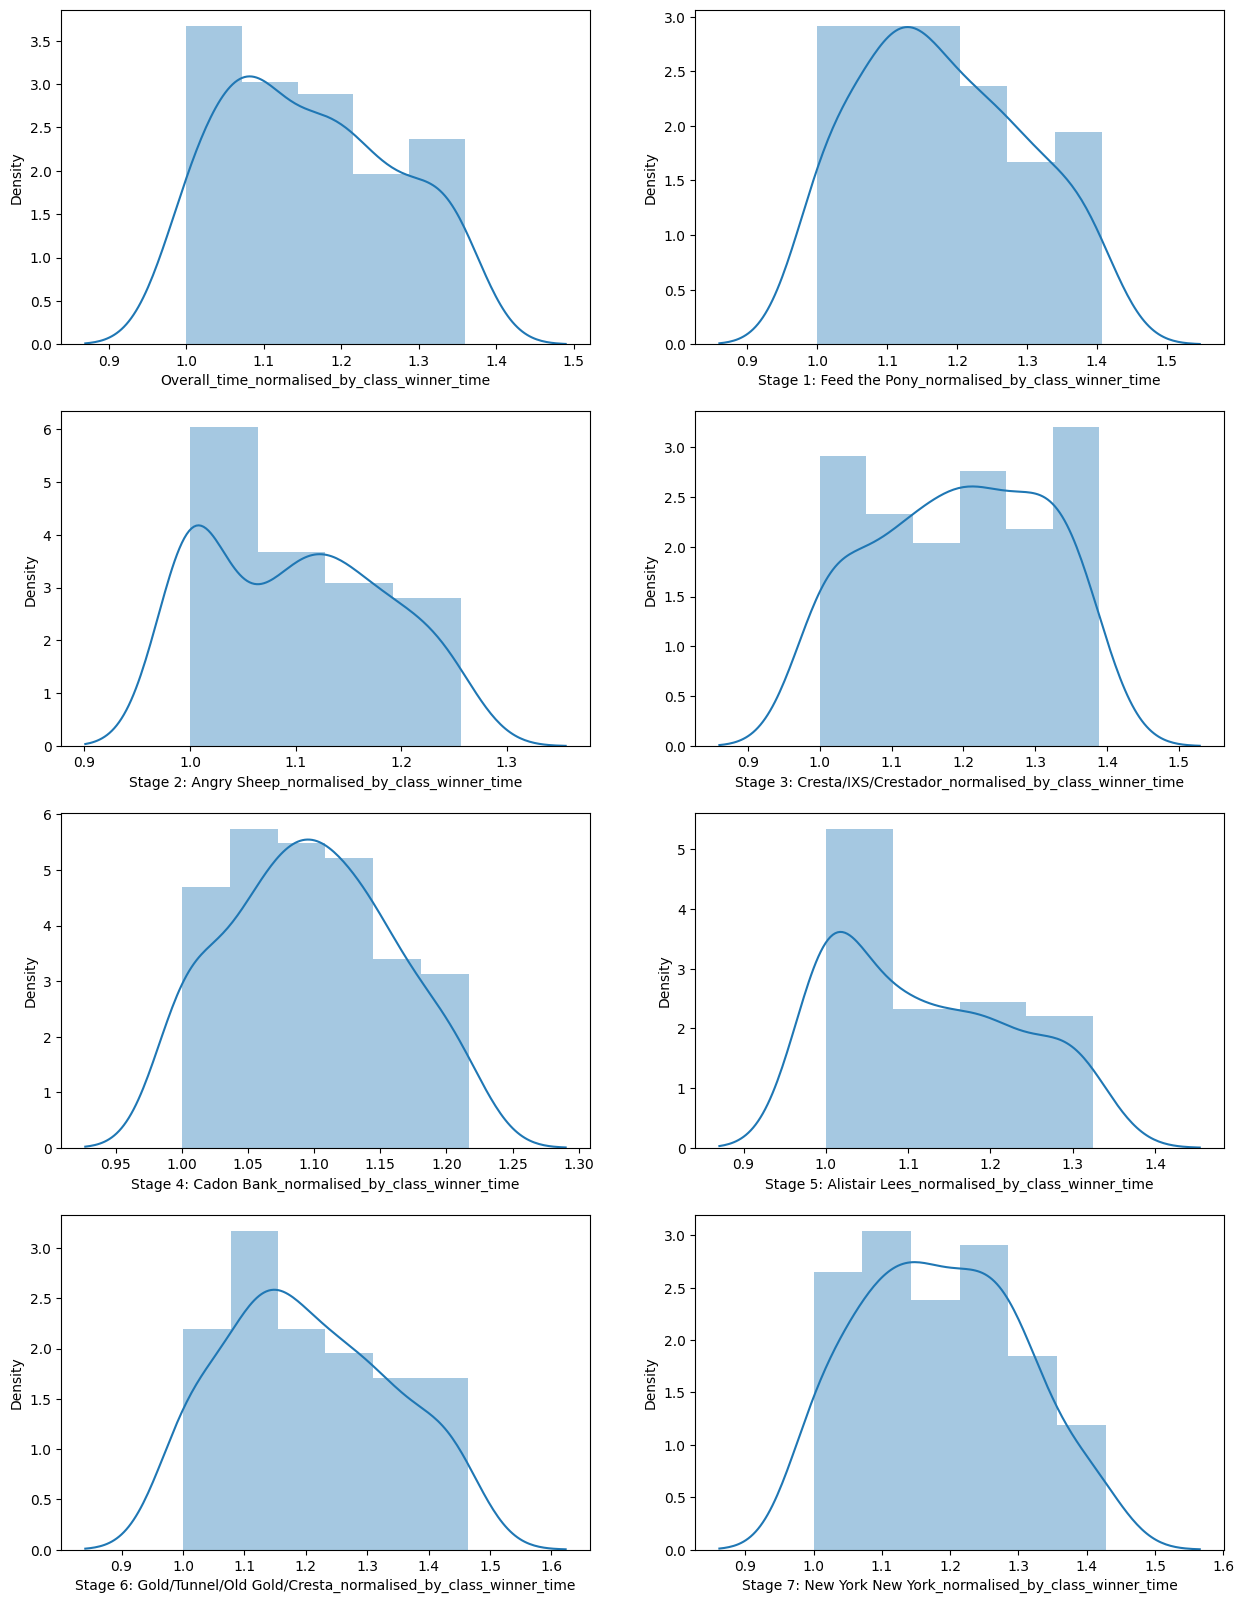

In [46]:
#distributions of the stages in one plot
percentile = 0.70
fig = plt.figure()

for i in range(min(8, len(stages))):
    fig.add_subplot(4,2,i+1)
    sns.distplot(percentileClipped(percentile, df[classNormStages[i]]))
    
fig.set_figwidth(15)
fig.set_figheight(20)

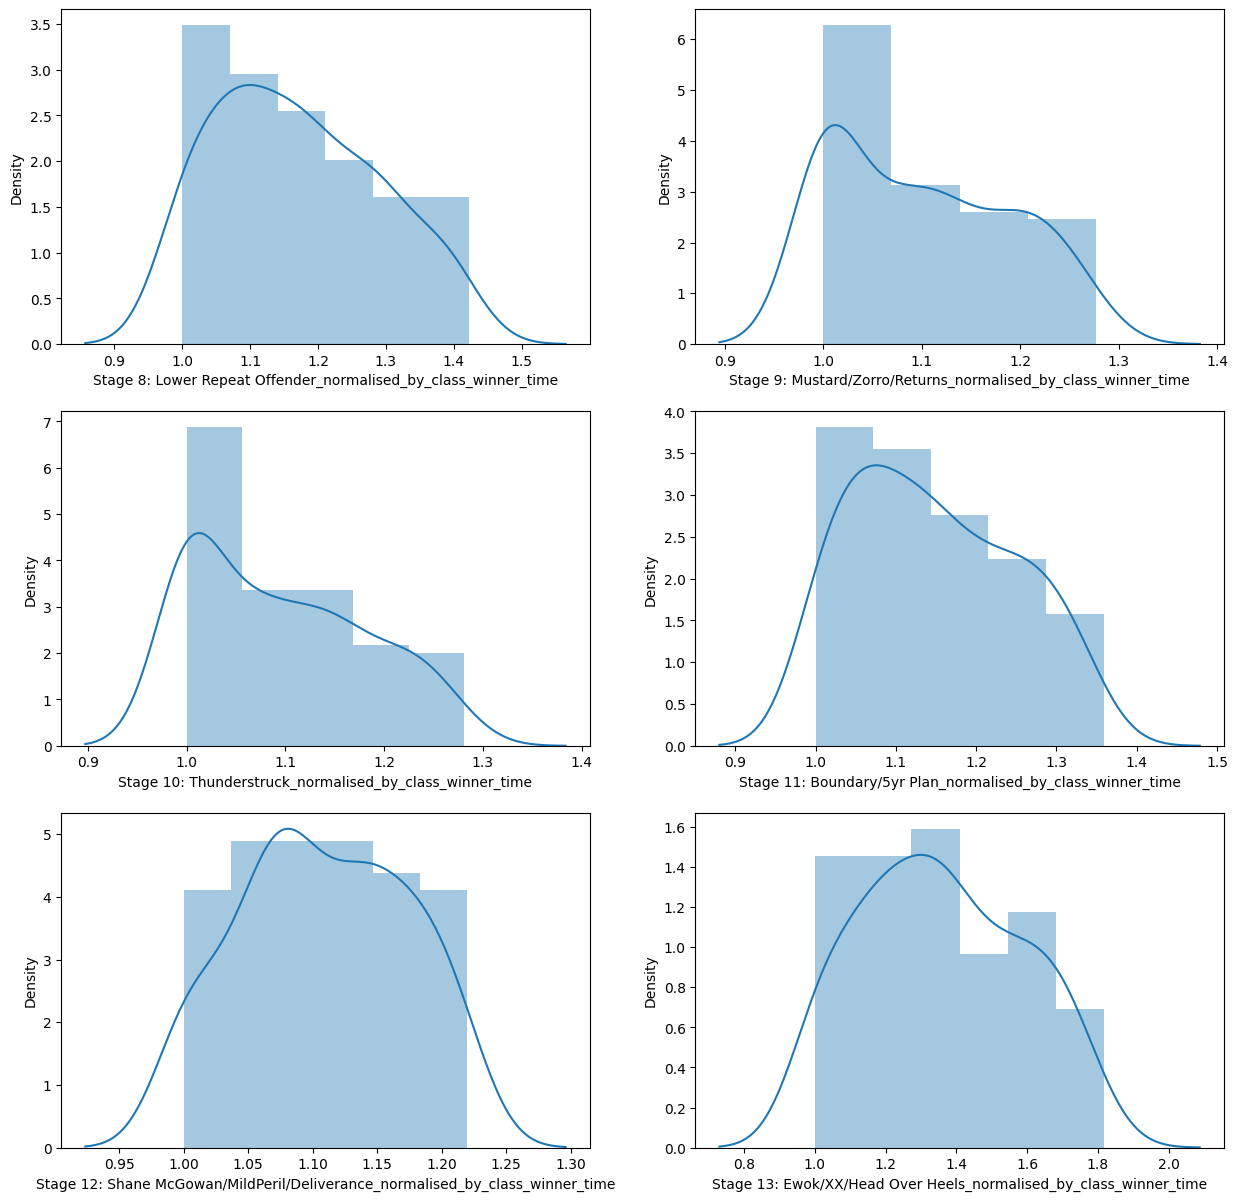

In [47]:
#distributions of the stages in one plot
percentile = 0.70
fig = plt.figure()

for i in range(max(0, len(stages) - 8)):
    fig.add_subplot(4,2,i+1)
    sns.distplot(percentileClipped(percentile, df[classNormStages[i+8]]))
    
fig.set_figwidth(15)
fig.set_figheight(20)


In [48]:
dfStageNorms = df[normStages[1:]]
df['Median'] = dfStageNorms.median(axis=1)
df['Min'] = dfStageNorms.min(axis=1)
df['StdDev'] = dfStageNorms.std(axis=1)

dfStageClassNorms = df[classNormStages[1:]]
df['Median_Class_Normalised'] = dfStageClassNorms.median(axis=1)
df['Min_Class_Normalised'] = dfStageClassNorms.min(axis=1)
df['Std_Class_Normalised'] = dfStageClassNorms.std(axis=1)

In [49]:
#df

,Name,Class,Stage 1: Feed the Pony,Stage 2: Angry Sheep,Stage 3: Cresta/IXS/Crestador,Stage 4: Cadon Bank,Stage 5: Alistair Lees,Stage 6: Gold/Tunnel/Old Gold/Cresta,Class_r,Stage 7: New York New York,...,Median,Min,StdDev,Median_Class_Normalised,Min_Class_Normalised,Std_Class_Normalised,PosOverall_time_normalised,PosOverall_time_normalised_by_class_winner_time,PosMedian,PosMedian_Class_Normalised
0,Cameron Jackson,18-34 Male,05:04.0,01:27.5,02:02.3,03:09.1,01:33.0,03:13.5,18-34 Male,03:07.4,...,1.000470,1.000000,0.015773,1.000470,1.000000,0.015773,1,1,1,10
1,Lewis Buchanan,18-34 Male,04:56.8,01:26.8,01:59.8,03:07.5,01:29.0,03:08.9,18-34 Male,03:15.5,...,1.004474,1.000000,0.021433,1.004474,1.000000,0.021433,2,11,2,11
2,Ben Jackson,18-34 Male,05:05.5,01:27.0,02:06.4,03:16.3,01:30.7,03:17.3,18-34 Male,03:14.9,...,1.040021,1.002304,0.016519,1.040021,1.002304,0.016519,3,14,3,15
3,Harvey Game,18-34 Male,05:08.1,01:32.6,02:10.5,03:17.9,01:31.3,03:16.6,18-34 Male,03:21.0,...,1.056444,1.032805,0.027501,1.056444,1.032805,0.027501,4,20,4,18
4,Ronan White,18-34 Male,05:16.8,01:34.9,02:07.7,03:13.8,01:32.7,03:25.4,18-34 Male,03:23.5,...,1.072693,1.033600,0.050260,1.072693,1.033600,0.050260,5,23,7,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,Emily Tuff,35-49 Female Short Course,15:36.2,NaN,07:12.2,06:34.4,NaN,13:59.0,35-49 Female Short Course,13:32.9,...,4.236410,1.973068,1.693849,1.000000,1.000000,0.000000,150,5,154,1
150,Gary Anderson,50+ Male Short Course,15:45.9,NaN,06:19.8,05:26.0,NaN,NaN,50+ Male Short Course,11:29.9,...,3.681430,1.738667,3.816840,2.228269,1.000000,2.711722,151,130,150,133
151,Steve West,35-49 Male,14:56.3,NaN,NaN,04:49.8,NaN,13:02.3,NaN,NaN,...,4.141345,1.545600,3.769839,3.704072,1.473310,3.222530,152,153,153,154
152,Stuart Duckworth,50+ Male,15:31.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.792668,2.649007,3.686411,3.488372,2.509410,3.030533,153,154,151,153


In [50]:
def calculatePositionOnSorted(measure):
    position = pd.Series(np.arange(pd.Series.count(df[measure])) + 1)
    sameMeasure = (df[measure] == df[measure].shift(1))

    j = [1]
    def previousPosIfEqual(i):
        if sameMeasure[i]:
            return j[0]
        else:
            j[0] = position[i]
            return position[i]
    
    pos  = [previousPosIfEqual(i) for i in (np.arange(pd.Series.count(df[measure])))]
    return pos

def addPositions(measure):
    df.sort_values(measure, inplace=True)
    name = 'Pos' + measure
    df[name] = calculatePositionOnSorted(measure)
    return name

positionFields = [addPositions(m) for m in ['Overall_time_normalised', 'Overall_time_normalised_by_class_winner_time', 'Median', 'Median_Class_Normalised']]
df.sort_values('Overall_time_normalised', inplace=True)

<font size="5">Who were the class winners on time? </font>

In [51]:
dataToView = [ 'Name', 'Class'] + stages + list(normStages) + classNormStages + ['Median', 'Median_Class_Normalised', 'Min', 'Min_Class_Normalised']  + positionFields                                          
dataToView
dfToView = df[dataToView]

#the class winners
dfToView[dfToView['Overall_time_normalised_by_class_winner_time'] < 1.000001][['Name', 'Class', 'Overall_time']]

,Name,Class,Overall_time
0,Cameron Jackson,18-34 Male,0:32:43.900000
5,Nigel Page,50+ Male,0:34:47.800000
6,Brendan Morris,35-49 Male,0:34:49.300000
10,Dylan Hayes,14-17 Male,0:35:29.300000
21,Tracy Moseley,35-49 Female,0:37:42.800000
108,Paul Christie,35-49 Male Short Course,1:11:35.500000
109,Stuart Mowbray,50+ Male Short Course,1:12:35.800000
111,Melanie Nice,18-34 Female Short Course,1:14:30.700000
133,Janet Clarke,50+ Female Short Course,1:33:20.600000
149,Emily Tuff,35-49 Female Short Course,2:02:57.600000


<font size="5">What if we discard outlying stages? </font>
  
<font size="3">If we take the stage results for each rider and pick only their middle result (the median), we discard any outlying slow (or fast) stages.</font>

In [52]:
# who were the top 10 median by class?
dfToView.sort_values('Median_Class_Normalised')[['Name', 'Class','Median_Class_Normalised', 'Overall_time']][0:10]

,Name,Class,Median_Class_Normalised,Overall_time
21,Tracy Moseley,35-49 Female,1.00000,0:37:42.800000
133,Janet Clarke,50+ Female Short Course,1.00000,1:33:20.600000
108,Paul Christie,35-49 Male Short Course,1.00000,1:11:35.500000
10,Dylan Hayes,14-17 Male,1.00000,0:35:29.300000
111,Melanie Nice,18-34 Female Short Course,1.00000,1:14:30.700000
5,Nigel Page,50+ Male,1.00000,0:34:47.800000
6,Brendan Morris,35-49 Male,1.00000,0:34:49.300000
109,Stuart Mowbray,50+ Male Short Course,1.00000,1:12:35.800000
149,Emily Tuff,35-49 Female Short Course,1.00000,2:02:57.600000
0,Cameron Jackson,18-34 Male,1.00047,0:32:43.900000


In [53]:
competitors_list = mr.Text(label="Which competitors would you like to compare?", value="Tracy Moseley, William Mulholland, Rowland Jowett, Elizabeth Goddard, John Barwood, Harry Lawrence, Xavier Kelsall")

mercury.Text

In [54]:
competitors_list = competitors_list.value.split(', ')

<font size="5">Section 2: Comparison of named competitors list</font>
  
<font size="3">Results ordered by overall time: note that any stages not completed were given a default time of 10 minutes. This will make this a bad metric: look at the median metrics for a more accurate analysis of riders who chose to miss stages. </font>

In [55]:
#index by name and select our group
dataNamed = dfToView.set_index('Name')

d = dataNamed.loc[competitors_list]

#show results ordered by race time
d.sort_values('Overall_time_normalised')[[ 'Class', 'Overall_time', 'Overall_time_normalised']]

,Class,Overall_time,Overall_time_normalised
Name,,,
Rowland Jowett,35-49 Male,0:37:06.900000,1.133917
Tracy Moseley,35-49 Female,0:37:42.800000,1.152197
William Mulholland,35-49 Male,0:39:27,1.205255
Elizabeth Goddard,35-49 Female,0:49:47.100000,1.521004
Harry Lawrence,18-34 Male,1:28:52.500000,2.715260
John Barwood,35-49 Male,1:32:14.300000,2.818015
Xavier Kelsall,35-49 Male,1:33:09.700000,2.846224


<font size="3">
  
Results ordered by overall time/class winner time  </font>

In [56]:
#show results ordered by race time
d.sort_values('Overall_time_normalised_by_class_winner_time')[[ 'Class', 'Overall_time_normalised_by_class_winner_time','Overall_time']]

,Class,Overall_time_normalised_by_class_winner_time,Overall_time
Name,,,
Tracy Moseley,35-49 Female,1.000000,0:37:42.800000
Rowland Jowett,35-49 Male,1.065859,0:37:06.900000
William Mulholland,35-49 Male,1.132915,0:39:27
Elizabeth Goddard,35-49 Female,1.320090,0:49:47.100000
John Barwood,35-49 Male,2.648878,1:32:14.300000
Xavier Kelsall,35-49 Male,2.675394,1:33:09.700000
Harry Lawrence,18-34 Male,2.715260,1:28:52.500000


<font size="3">
  
Results ordered by the fastest time/winners time on any stage (note: winner, not class winner)</font>

In [57]:
#results ordered by min stage time/stage winners time on any stage
d.sort_values('Min')[['Class','Min','Overall_time']]

,Class,Min,Overall_time
Name,,,
Rowland Jowett,35-49 Male,1.069333,0:37:06.900000
Tracy Moseley,35-49 Female,1.107714,0:37:42.800000
Harry Lawrence,18-34 Male,1.113067,1:28:52.500000
William Mulholland,35-49 Male,1.128035,0:39:27
John Barwood,35-49 Male,1.194667,1:32:14.300000
Xavier Kelsall,35-49 Male,1.201600,1:33:09.700000
Elizabeth Goddard,35-49 Female,1.316998,0:49:47.100000


<font size="3">
  
Results ordered by the fastest time/class winner time on any stage</font>

In [58]:
# as above but by class stage winners time
d.sort_values('Min_Class_Normalised')[['Class','Min_Class_Normalised','Overall_time']]

,Class,Min_Class_Normalised,Overall_time
Name,,,
Tracy Moseley,35-49 Female,1.000000,0:37:42.800000
Rowland Jowett,35-49 Male,1.013388,0:37:06.900000
William Mulholland,35-49 Male,1.066549,0:39:27
Harry Lawrence,18-34 Male,1.113067,1:28:52.500000
John Barwood,35-49 Male,1.138790,1:32:14.300000
Xavier Kelsall,35-49 Male,1.145399,1:33:09.700000
Elizabeth Goddard,35-49 Female,1.173485,0:49:47.100000


<font size="3">
  
Results ordered by the median of each riders time/winner time on all stages (note winner not class winner)</font>

In [59]:
# the results sorted by median (stage time/stage winners time)
d.sort_values('Median')[['Class','Median', 'Overall_time']]

,Class,Median,Overall_time
Name,,,
Rowland Jowett,35-49 Male,1.138140,0:37:06.900000
Tracy Moseley,35-49 Female,1.161290,0:37:42.800000
William Mulholland,35-49 Male,1.210291,0:39:27
Elizabeth Goddard,35-49 Female,1.551761,0:49:47.100000
John Barwood,35-49 Male,2.649007,1:32:14.300000
Harry Lawrence,18-34 Male,2.649007,1:28:52.500000
Xavier Kelsall,35-49 Male,2.649007,1:33:09.700000


<font size="3">
  
Results ordered by the median of each riders time/class winner time on all stages</font>

In [60]:

dz = d.sort_values('Median_Class_Normalised')[['Class','Median_Class_Normalised', 'Overall_time']] #['Class', 'Time', 'TimeNorm', 'TimeNormClassNorm', 'Median', 'MedianClassNorm' , 'Min' , 'MinClassNorm']
dz

,Class,Median_Class_Normalised,Overall_time
Name,,,
Tracy Moseley,35-49 Female,1.000000,0:37:42.800000
Rowland Jowett,35-49 Male,1.066089,0:37:06.900000
William Mulholland,35-49 Male,1.122271,0:39:27
Elizabeth Goddard,35-49 Female,1.313433,0:49:47.100000
John Barwood,35-49 Male,2.556455,1:32:14.300000
Xavier Kelsall,35-49 Male,2.556455,1:33:09.700000
Harry Lawrence,18-34 Male,2.649007,1:28:52.500000


In [61]:
d.sort_values('Overall_time_normalised')

,Class,Overall_time,Stage 1: Feed the Pony,Stage 2: Angry Sheep,Stage 3: Cresta/IXS/Crestador,Stage 4: Cadon Bank,Stage 5: Alistair Lees,Stage 6: Gold/Tunnel/Old Gold/Cresta,Stage 7: New York New York,Stage 8: Lower Repeat Offender,...,Stage 12: Shane McGowan/MildPeril/Deliverance_normalised_by_class_winner_time,Stage 13: Ewok/XX/Head Over Heels_normalised_by_class_winner_time,Median,Median_Class_Normalised,Min,Min_Class_Normalised,PosOverall_time_normalised,PosOverall_time_normalised_by_class_winner_time,PosMedian,PosMedian_Class_Normalised
Name,,,,,,,,,,,,,,,,,,,,,
Rowland Jowett,35-49 Male,0:37:06.900000,05:37.8,01:38.8,02:32.0,03:20.5,01:38.4,04:02.2,03:41.7,01:14.5,...,1.042182,1.112832,1.138140,1.066089,1.069333,1.013388,16,25,17,21
Tracy Moseley,35-49 Female,0:37:42.800000,05:40.8,01:40.8,02:25.9,03:29.6,01:38.1,03:56.7,03:46.3,01:14.3,...,1.000000,1.000000,1.161290,1.000000,1.107714,1.000000,22,5,25,5
William Mulholland,35-49 Male,0:39:27,05:53.5,01:43.2,02:56.6,03:39.3,01:47.5,03:59.4,04:02.2,01:17.1,...,1.088624,1.130531,1.210291,1.122271,1.128035,1.066549,37,48,38,47
Elizabeth Goddard,35-49 Female,0:49:47.100000,07:52.1,02:08.3,03:31.5,04:15.9,02:18.2,05:26.3,04:50.8,01:46.6,...,1.173485,1.660550,1.551761,1.313433,1.316998,1.173485,96,93,105,97
Harry Lawrence,18-34 Male,1:28:52.500000,05:43.8,01:38.6,02:33.9,03:28.7,01:44.9,03:42.6,NaN,NaN,...,2.649007,15.503876,2.649007,2.649007,1.113067,1.113067,125,142,127,150
John Barwood,35-49 Male,1:32:14.300000,06:54.3,01:48.8,03:01.0,03:44.0,02:07.3,04:38.9,NaN,NaN,...,2.556455,13.274336,2.649007,2.556455,1.194667,1.138790,128,136,134,143
Xavier Kelsall,35-49 Male,1:33:09.700000,07:16.1,01:59.1,03:12.7,03:45.3,01:59.4,04:57.1,NaN,NaN,...,2.556455,13.274336,2.649007,2.556455,1.201600,1.145399,132,139,129,141
